# 라이브러리 로드

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

from scipy.stats import skew 
from scipy.stats import norm
from scipy.stats import kurtosis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings(action='ignore')
plt.style.use('seaborn-whitegrid')
plt.rc('font', family='Malgun Gothic')  # 한글 폰트 사용을 위해서 세팅
pd.set_option('max_columns', 80) # 최대 컬럼 갯수 지정
pd.set_option('max_rows', 80) # 최대 로우 갯수 지정

# 필수 함수 정의
## 전처리 함수

In [3]:
def load_data(data):
    ### 데이터를 로드하여 전처리하는 함수 ###
    df = pd.read_csv(data, encoding='cp949')
    df = df[df['상권_구분_코드_명'] != '관광특구']
    df['상권_코드'] = df['상권_코드'].astype('str')
    df['상권_코드'] = df['상권_코드'].apply(lambda x: str(x))
    df['서비스_업종_코드_명'] = df['서비스_업종_코드_명'].apply(categorization)
    df = df[['기준_년_코드','기준_분기_코드','상권_구분_코드_명','상권_코드','서비스_업종_코드_명','분기당_매출_금액',
             '주중_매출_금액','주말_매출_금액','월요일_매출_금액','화요일_매출_금액','수요일_매출_금액','목요일_매출_금액',
             '금요일_매출_금액','토요일_매출_금액','일요일_매출_금액','시간대_00~06_매출_금액','시간대_06~11_매출_금액',
             '시간대_11~14_매출_금액','시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액',
             '남성_매출_금액','여성_매출_금액','연령대_10_매출_금액','연령대_20_매출_금액','연령대_30_매출_금액',
             '연령대_40_매출_금액','연령대_50_매출_금액','연령대_60_이상_매출_금액']]
    return df

def categorization(x):
    if x == '청과상' or x == '수산물판매' or x == '육류판매' or x == '미곡판매' or x == '반찬가게' or \
       x == '치과의원' or x == '의료기기' or x == '의약품' or x == '한의원' or x == '일반의원' or \
       x == '편의점' or x == '슈퍼마켓' or x == '세탁소' or x == '제과점':
        return '생활 필수'
    
    elif x == '미용재료' or x == '화장품' or x == '피부관리실' or x == '네일숍' or x == '미용실' or \
         x == '한복점' or x ==  '섬유제품' or x ==  '유아의류' or x == '안경' or x == '신발' or \
         x == '가방' or x == '의류임대' or x == '일반의류':
        return '미용/의류'
    
    
    elif x == '노래방' or x == '전자게임장' or x == 'PC방' or x == '골프연습장' or x == '당구장' or \
         x == 'DVD방' or x == '기타오락장' or x == '볼링장' or x == '스포츠클럽' or x == '스포츠 강습' or \
         x == '게스트하우스' or x == '여행사' or x == '서적':
        return '여가'
    
    elif x == '분식전문점' or x == '커피-음료' or x == '호프-간이주점' or x == '일식음식점' or \
         x == '중식음식점' or x == '한식음식점' or x == '양식음식점' or x == '패스트푸드점' or x == '치킨전문점':
        return '외식'
    
    elif x == '세무사사무소' or x == '법무사사무소' or x == '기타법무서비스' or x == '변리사사무소' or x == '회계사사무소' or \
         x == '변호사사무소' or x == '부동산중개업' or x == '독서실' or x == '문구' or x == '컴퓨터학원' or x == '고시원' or \
         x == '예술학원' or x == '외국어학원' or x == '일반교습학원' or x == '가전제품' or x == '핸드폰' or x == '통신기기수리' or \
         x == '컴퓨터및주변장치판매' or x == '가전제품수리' or x == '자동차미용' or x == '자동차수리' or x == '중고차판매' or \
         x == '자전거 및 기타운송장비' or x == '모터사이클수리'  or x == '주류도매':
        return '편의시설'
    
    else:
        return '기타'

## 시각화 함수

In [3]:
def regplot(df, target_df):
    col = 6
    row = 4
    
    log_target = np.log1p(target_df['분기당_매출_금액'])
    
    fig, ax = plt.subplots(row, col, figsize=(row*4, col*4), constrained_layout=True)

    for r in range(0, row):
        for c in range(0, col):
            i = r*col+c
            if i < len(df.columns):
                sns.regplot(df[df.columns[i]], log_target, ax=ax[r][c])
                ax[r][c].set_title(str(df.columns[i]))
                
## 모든 피처를 log1p 변환후 regplot을 그림
def log1p_regplot(df, target_df):
    col = 6
    row = 4
    
    log_target = np.log1p(target_df['분기당_매출_금액'])
    
    fig, ax = plt.subplots(row, col, figsize=(row*4, col*4), constrained_layout=True)

    for r in range(0, row):
        for c in range(0, col):
            i = r*col+c
            if i < len(df.columns):
                sns.regplot(np.log1p(df[df.columns[i]]), log_target, ax=ax[r][c])
                ax[r][c].set_title(str(df.columns[i]))
                
def distplot(df):
    col = 6
    row = 4
     
    fig, ax = plt.subplots(row, col, figsize=(row*6, col*2), constrained_layout=True)

    for r in range(0, row):
        for c in range(0, col):
            i = r*col+c
            if i < len(df.columns):
                sns.distplot(df[df.columns[i]], ax=ax[r][c])
                ax[r][c].set_title(str(df.columns[i]))

## 모든 피처를 log1p 변환후 regplot을 그림
def log1p_distplot(df):
    col = 6
    row = 4
     
    fig, ax = plt.subplots(row, col, figsize=(row*6, col*2), constrained_layout=True)

    for r in range(0, row):
        for c in range(0, col):
            i = r*col+c
            if i < len(df.columns):
                sns.distplot(np.log1p(df[df.columns[i]]), ax=ax[r][c])
                ax[r][c].set_title(str(df.columns[i]))
                
## mse와 rmse와 r2스코어를 출력
def linear_reg(feature, target):
    X_train, X_test, y_train, y_test = train_test_split(feature, target, 
                                                        test_size=0.2, random_state=1)
    lrf = LinearRegression()
    lrf.fit(X_train, y_train)
    pred = lrf.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)
    print( mse, rmse, r2 )
   

In [4]:
 
## 왜도와 첨도를 그리는 함수
def how_much_skew(df):
    
    cols = ['주중_매출_금액', '주말_매출_금액', '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액',
       '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액',
       '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액',
       '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액',
       '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액',
       '연령대_50_매출_금액', '연령대_60_이상_매출_금액']
    
    skewness = df[cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
    high_skewness = skewness[abs(skewness) > 0.5]
    skew_feat = high_skewness.index
    print(high_skewness)
    print(skew_feat)

# 데이터 로드

In [5]:
# 1496개의 상권코드를 가지고 있는 파일 로드
store_code = gpd.read_file('상권_geometry_좌표.geojson')

# store_code안에 관광특구 데이터 제거
store_code = store_code[store_code['TRDAR_SE_1']!='관광특구']

# store_code의 column 이름 재설정
store_code = store_code.rename(columns={'TRDAR_CD':'상권_코드', 'TRDAR_SE_1': '상권_구분_코드_명'})

# store_code 상권코드 str화
store_code['상권_코드'] = store_code['상권_코드'].astype('str')
store_code['상권_코드'] = store_code['상권_코드'].apply(lambda x: str(x))

# 데이터프레임 재구성
store_code = store_code[['상권_코드','상권_구분_코드_명']]
store_code.sort_values(by='상권_코드', inplace=True)

# 형태 확인
print(store_code.shape)
store_code.head()

(1490, 2)


,상권_코드,상권_구분_코드_명
914,1000001,골목상권
915,1000002,골목상권
916,1000003,골목상권
856,1000004,골목상권
857,1000005,골목상권


In [4]:
store_2021 = load_data('서울시 우리마을가게 상권분석서비스(상권-추정매출).csv') 
store_2020 = load_data('서울시 우리마을가게상권분석서비스(상권-추정매출)_2020.csv') 
store_2019 = load_data('서울시 우리마을가게 상권분석서비스(상권-추정매출)_2019.csv')
store_2018 = load_data('서울시 우리마을가게 상권분석서비스(상권-추정매출)_2018.csv')

In [7]:
store_2021.head(2)

,기준_년_코드,기준_분기_코드,상권_구분_코드_명,상권_코드,서비스_업종_코드_명,분기당_매출_금액,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액
277,2021,2,전통시장,1001490,기타,38015377,34381721,3633656,7744506,5706478,9060408,3281433,8588896,3261312,372344,0,4781536,5737630,4188226,23307985,0,2901036,35114341,0,905790,815211,21603094,2114468,12576814
278,2021,2,전통시장,1001490,기타,8544694,6381424,2163270,1188807,774836,1343391,1357082,1717308,2163270,0,0,693577,2487664,2577626,2785827,0,2426241,5784461,0,473475,1229756,1736247,2077533,2693691


# 2021년
## 2021년 시각화

In [8]:
copy_2021= store_2021[['주중_매출_금액', '주말_매출_금액', '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액',
                       '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액',
                       '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액',
                       '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액',
                       '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액',
                       '연령대_50_매출_금액', '연령대_60_이상_매출_금액']]

In [9]:
how_much_skew(copy_2021)

시간대_00~06_매출_금액    173.661531
일요일_매출_금액           65.829571
시간대_14~17_매출_금액     64.036086
주말_매출_금액            63.146788
토요일_매출_금액           61.754703
금요일_매출_금액           60.774586
수요일_매출_금액           60.236372
화요일_매출_금액           57.543766
목요일_매출_금액           57.396949
연령대_40_매출_금액        56.933276
주중_매출_금액            56.536002
시간대_11~14_매출_금액     55.501683
남성_매출_금액            55.208754
연령대_60_이상_매출_금액     52.806648
연령대_10_매출_금액        50.345636
월요일_매출_금액           49.063905
연령대_50_매출_금액        46.821138
시간대_06~11_매출_금액     45.740451
시간대_17~21_매출_금액     44.802368
연령대_30_매출_금액        40.654547
여성_매출_금액            34.301402
시간대_21~24_매출_금액     31.295822
연령대_20_매출_금액        29.552681
dtype: float64
Index(['시간대_00~06_매출_금액', '일요일_매출_금액', '시간대_14~17_매출_금액', '주말_매출_금액',
       '토요일_매출_금액', '금요일_매출_금액', '수요일_매출_금액', '화요일_매출_금액', '목요일_매출_금액',
       '연령대_40_매출_금액', '주중_매출_금액', '시간대_11~14_매출_금액', '남성_매출_금액',
       '연령대_60_이상_매출_금액', '연령대_10_매출_금액', '월요일_매출_금액', '연령대_50_매출_금액',
       '시간대_06~1

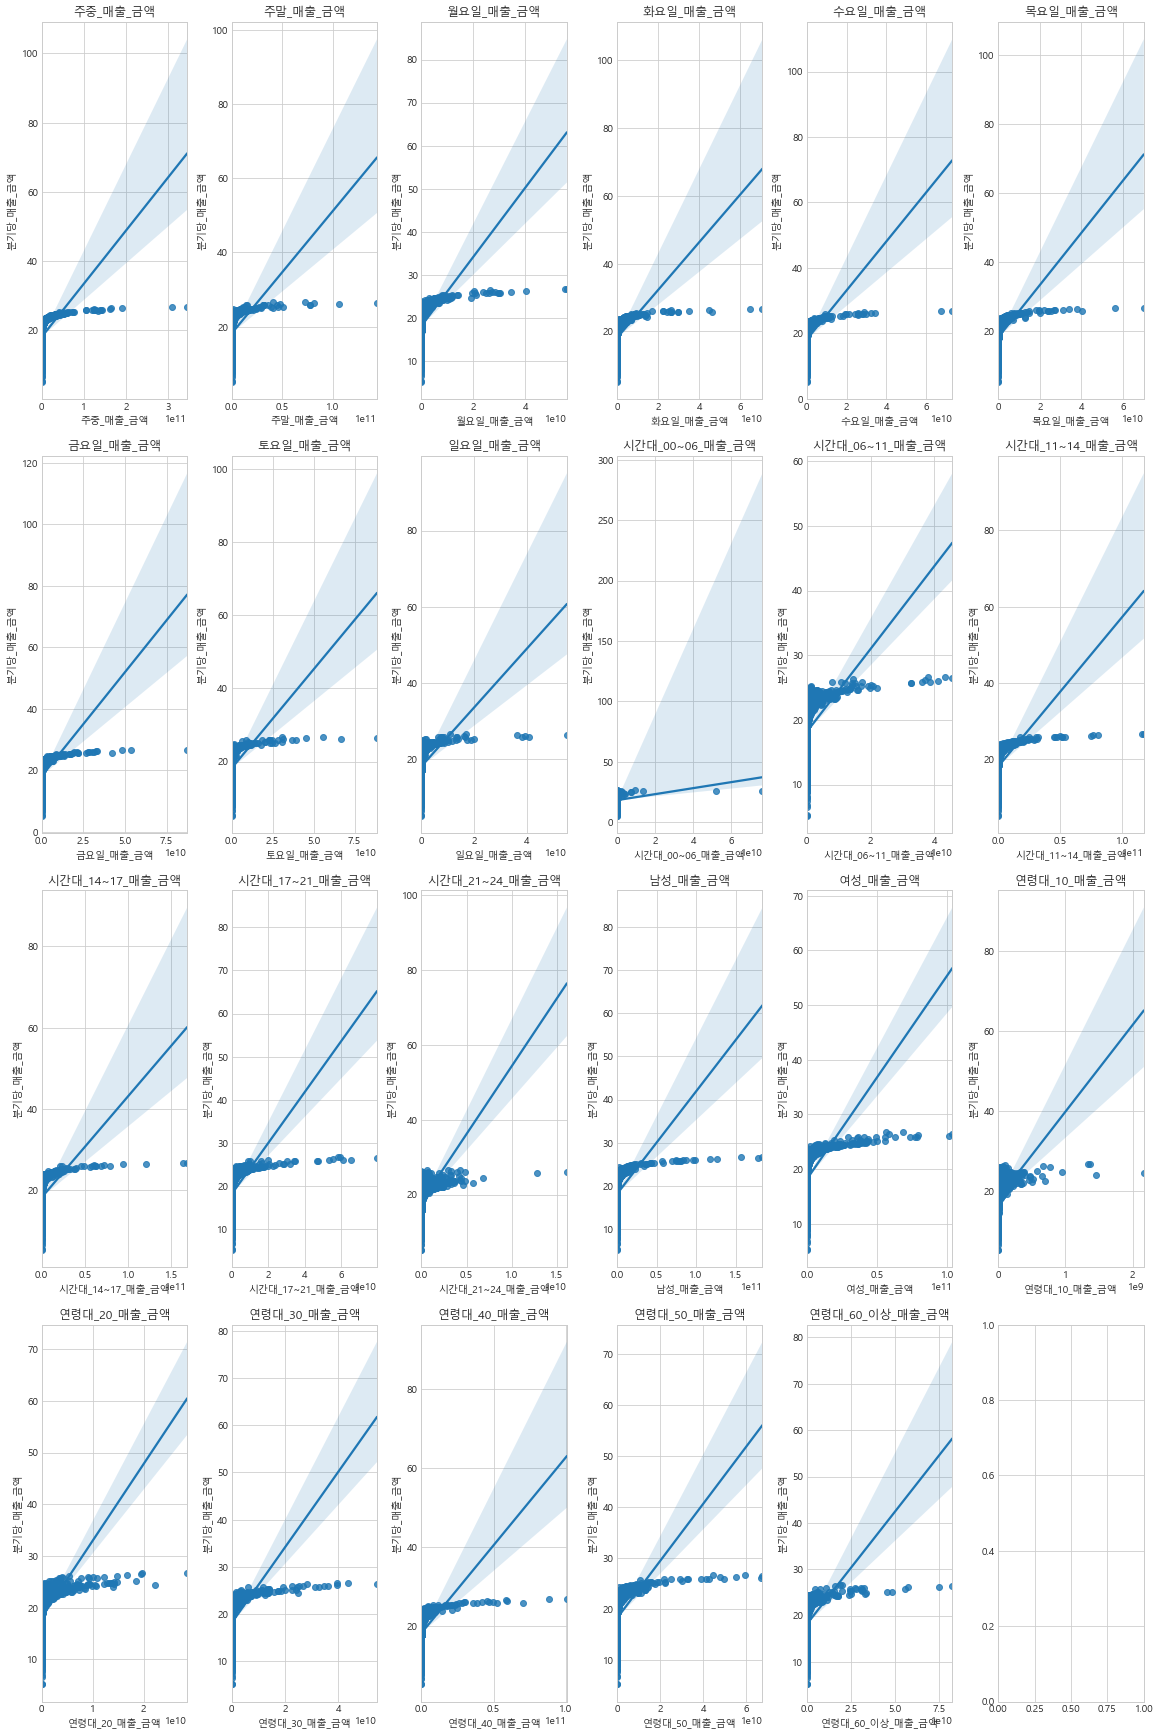

In [10]:
regplot(copy_2021, store_2021)

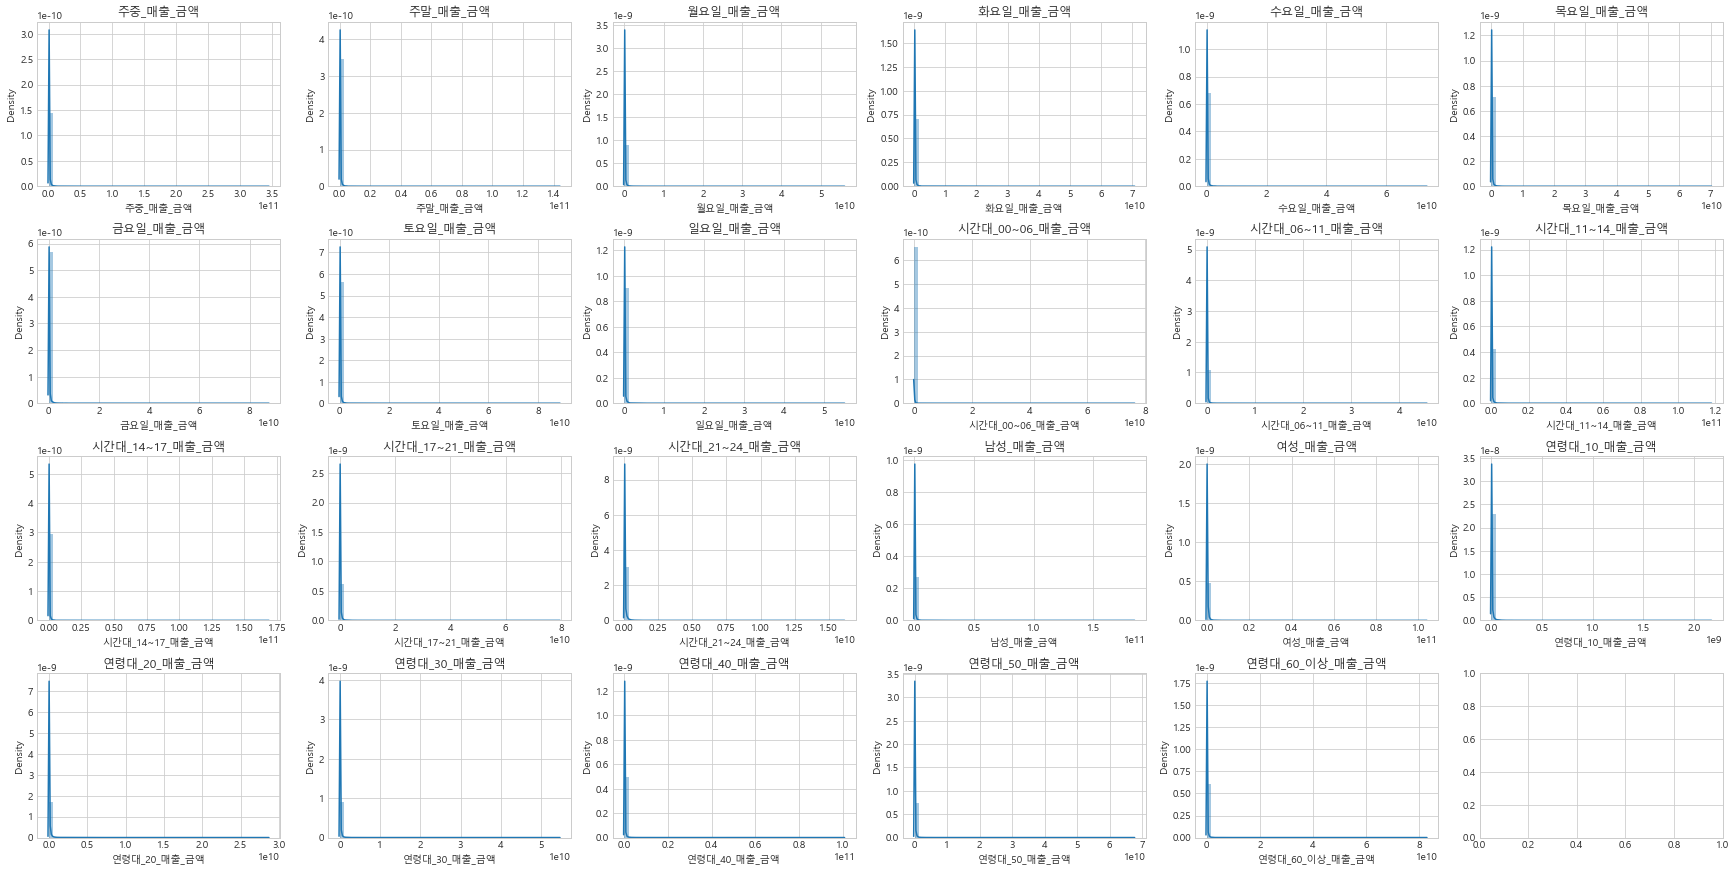

In [11]:
distplot(copy_2021)

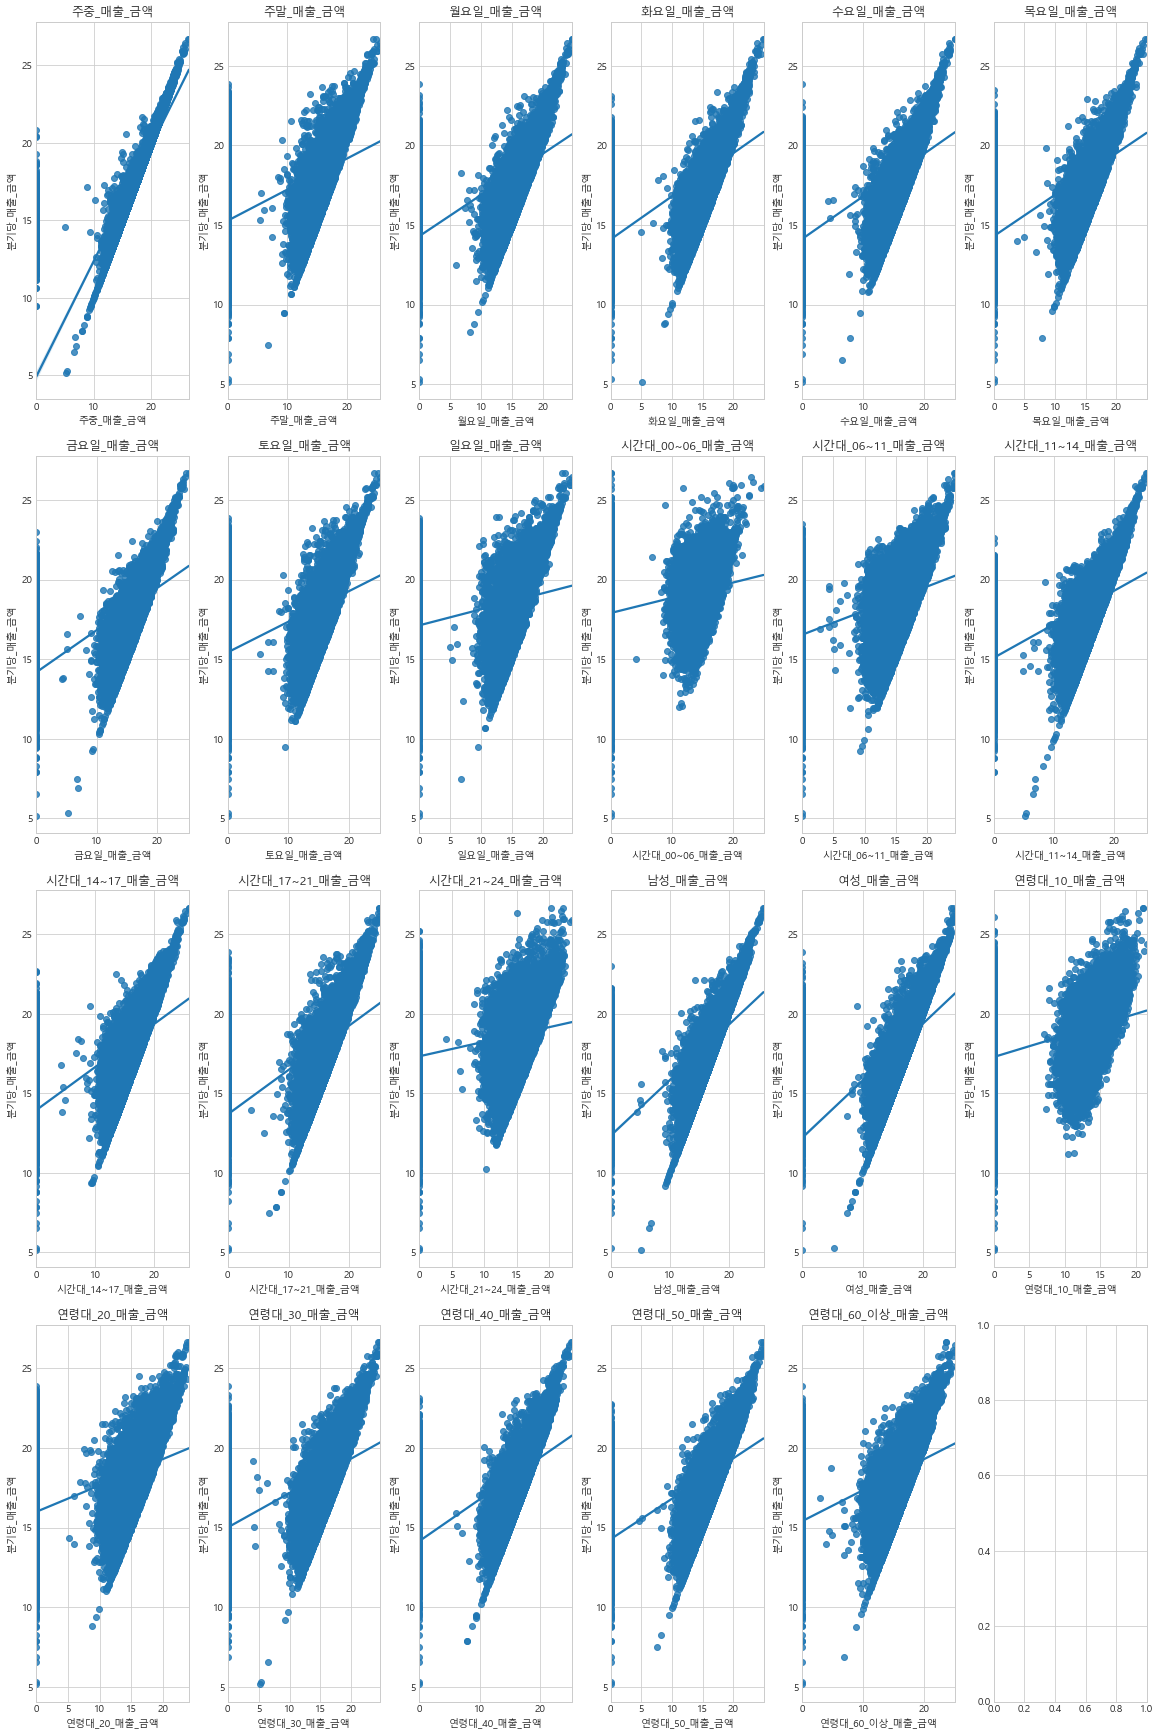

In [12]:
log1p_regplot(copy_2021, store_2021)

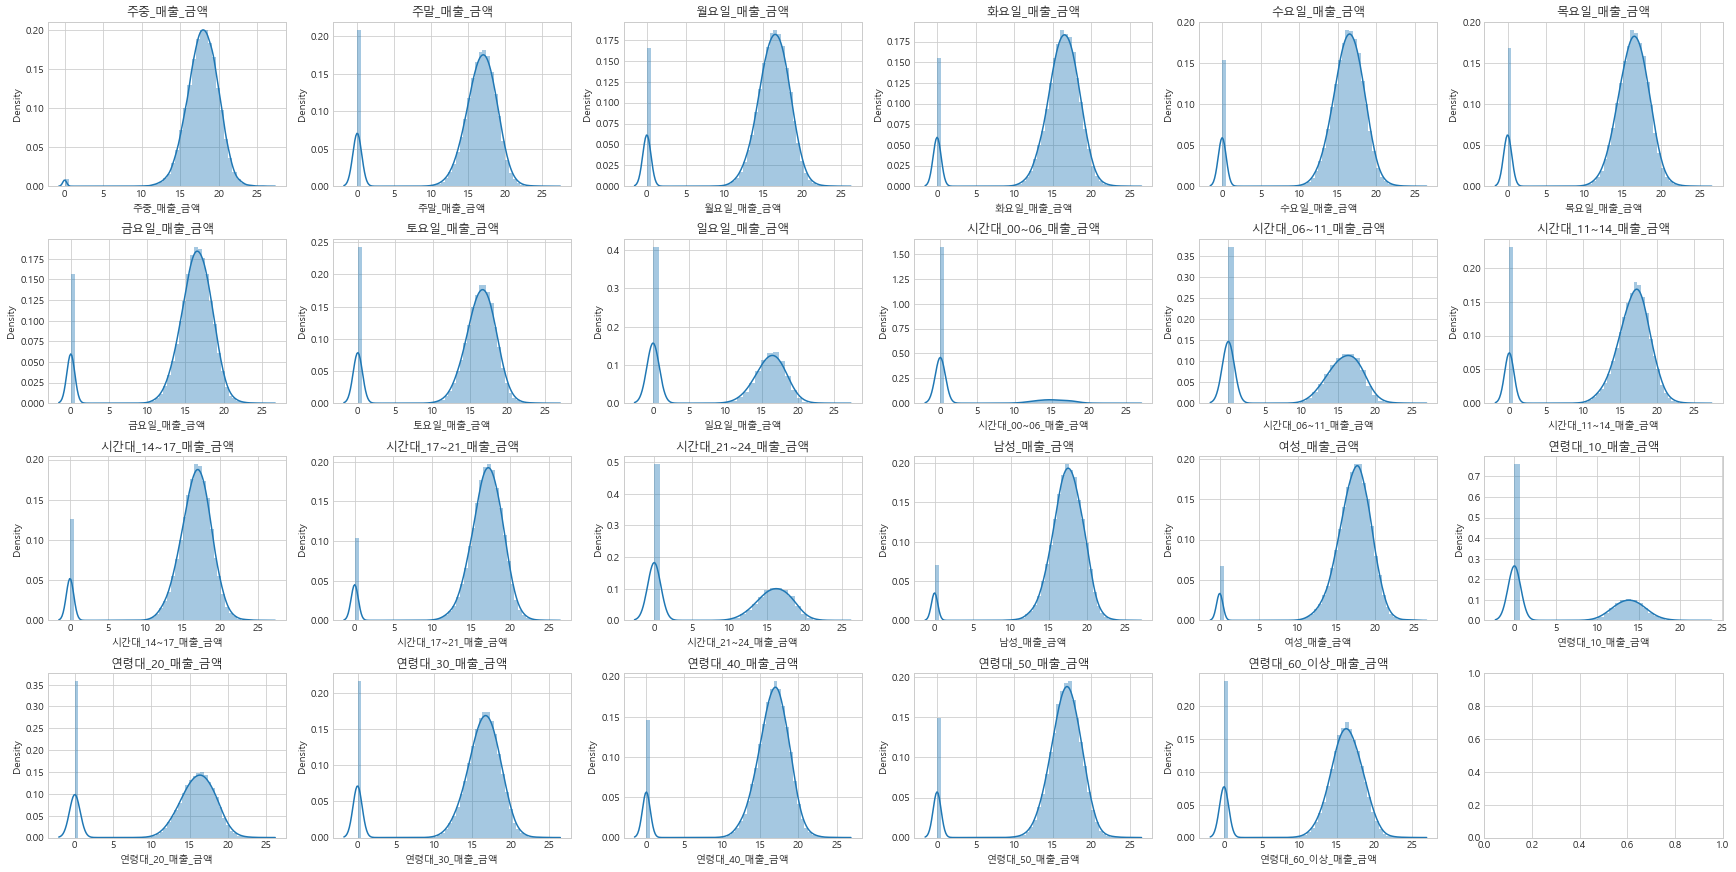

In [13]:
log1p_distplot(copy_2021)

## 2021년 전처리

In [14]:
# 0 값이 40%를 넘으면 그 feature를 삭제하며 0값을 그 feature의 평균값으로 치환
def drop_col(origin_df):
    df = origin_df.copy()
    
    # 금액 column들만 조사하기 위한 범위 (33~56)
    for col in df.columns[6:]:
        zero_ratio =  sum(df[col]==0)/len(df[col])
        if zero_ratio >= 0.4:
            df.drop(col, axis=1, inplace=True)
        # 40%가 넘지 않으면 그 컬럼의 0값을 평균값으로 치환
        else:
            df[col].replace(0, np.nan, inplace=True)
            col_mean = np.nanmean(df[col].values)
            df[col].fillna(col_mean, inplace=True)
        
    return df

prepro_2021 = drop_col(store_2021)
prepro_2021.head(2)

,기준_년_코드,기준_분기_코드,상권_구분_코드_명,상권_코드,서비스_업종_코드_명,분기당_매출_금액,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,남성_매출_금액,여성_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액
277,2021,2,전통시장,1001490,기타,38015377,34381721.0,3633656.0,7744506.0,5706478.0,9060408.0,3281433.0,8588896.0,3261312.0,3.723440e+05,4781536.0,5737630.0,4188226.0,23307985.0,2901036.0,35114341.0,905790.0,815211.0,21603094.0,2114468.0,12576814.0
278,2021,2,전통시장,1001490,기타,8544694,6381424.0,2163270.0,1188807.0,774836.0,1343391.0,1357082.0,1717308.0,2163270.0,6.739962e+07,693577.0,2487664.0,2577626.0,2785827.0,2426241.0,5784461.0,473475.0,1229756.0,1736247.0,2077533.0,2693691.0


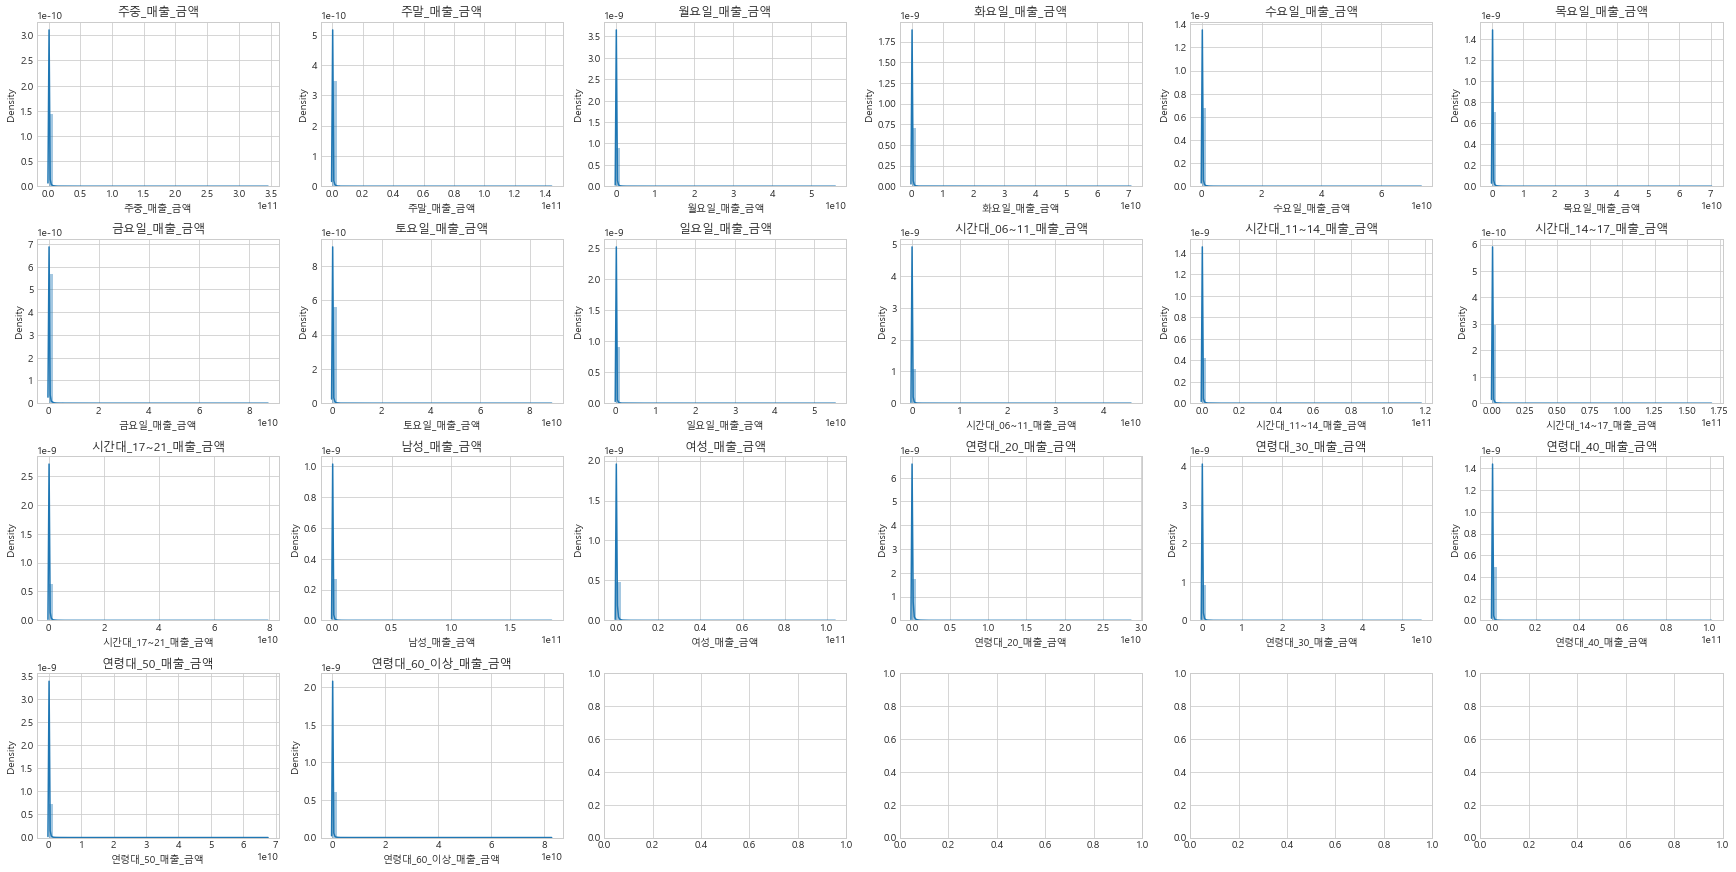

In [15]:
distplot(prepro_2021.iloc[:,6:])

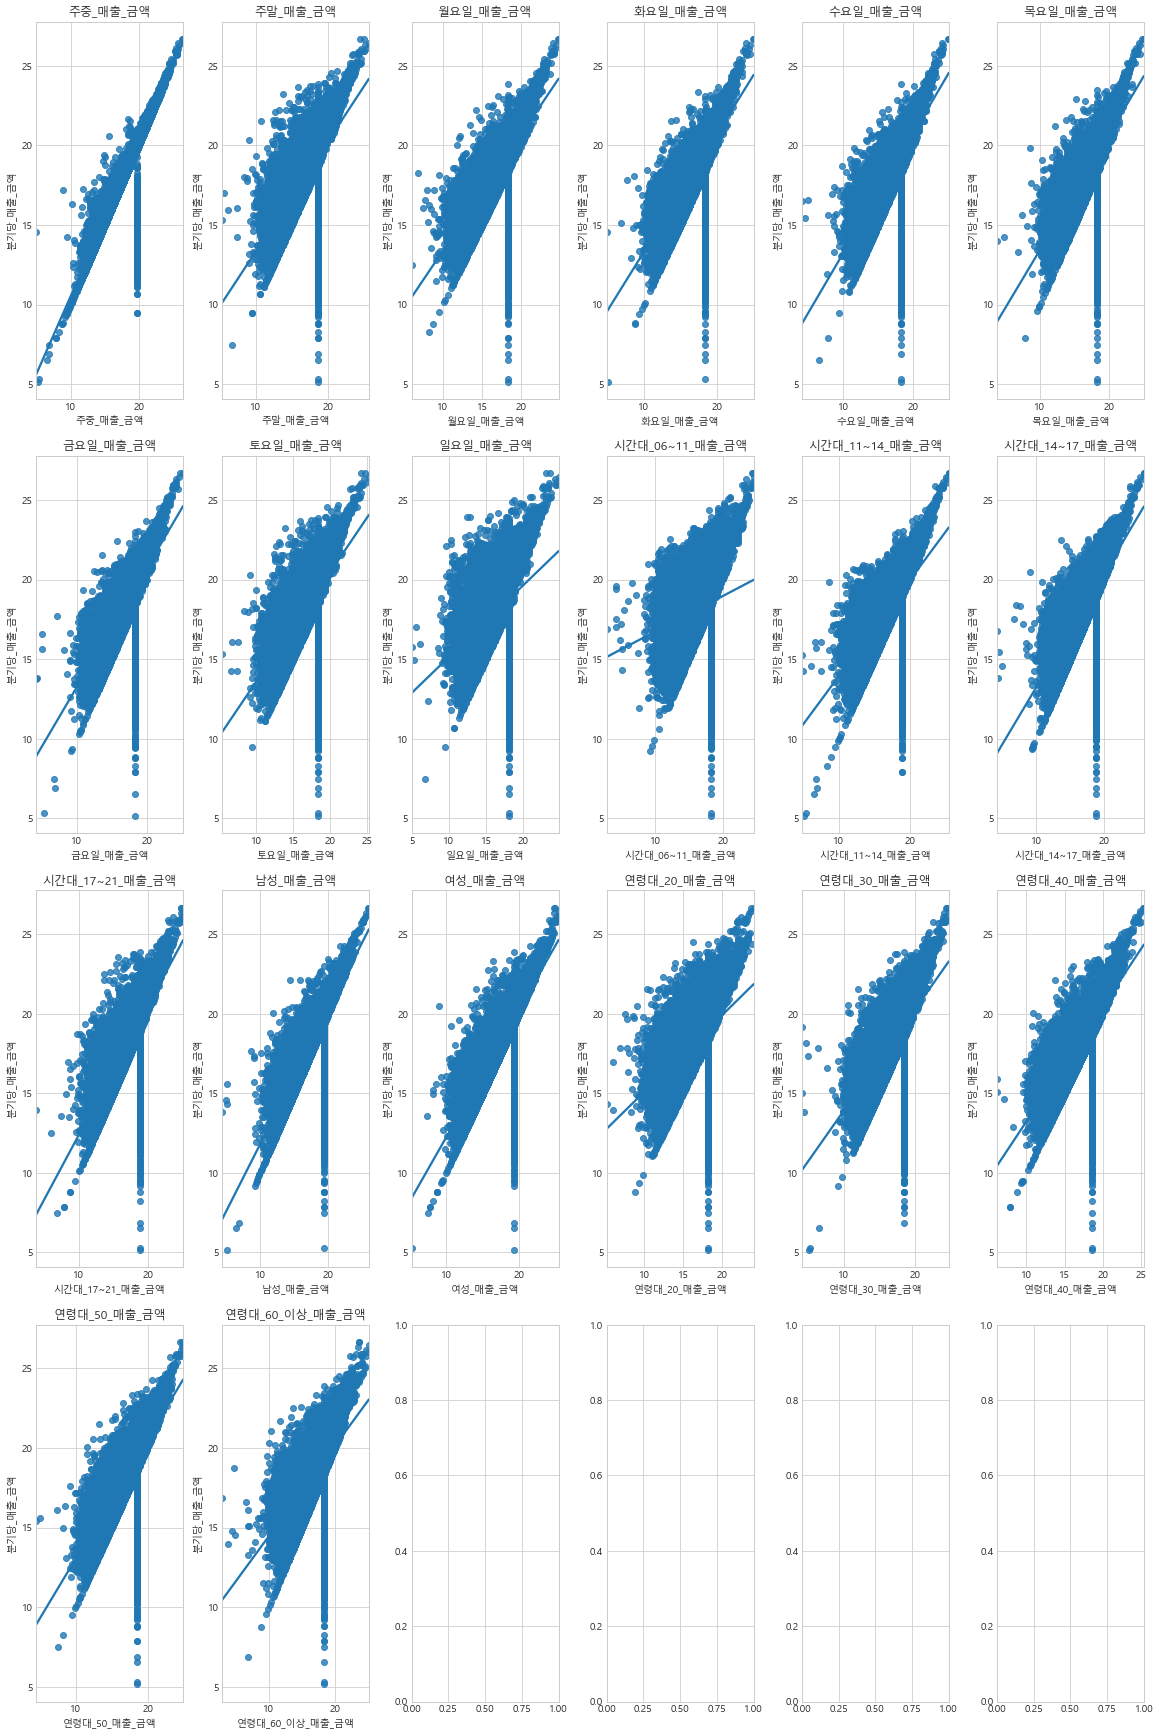

In [16]:
log1p_regplot(prepro_2021.iloc[:,6:], store_2021)

In [17]:
def make_ratio(df, col):
    col_revenue = df.groupby(['상권_코드', '기준_분기_코드'])[col].sum()
    quart_revenue = df.groupby(['상권_코드', '기준_분기_코드'])['분기당_매출_금액'].sum()
    tmp_df = (col_revenue/quart_revenue).to_frame()
    tmp_df.columns = [col]
    
    return tmp_df

In [18]:
# 주중 총매출 비율
weekday = make_ratio(prepro_2021, '주중_매출_금액')
new_table = weekday
new_table.head()

주중_매출_금액
상권_코드   기준_분기_코드          
1000001 1         0.802027
        2         0.685585
1000002 1         0.649057
        2         0.615219
1000003 1         0.733620

In [19]:
# 주말 총매출 비율
weekend = make_ratio(prepro_2021, '주말_매출_금액')
new_table = pd.merge(new_table, weekend, right_index=True, left_index=True)
new_table.head()

주중_매출_금액  주말_매출_금액
상권_코드   기준_분기_코드                    
1000001 1         0.802027  0.309408
        2         0.685585  0.314415
1000002 1         0.649057  0.350943
        2         0.615219  0.413213
1000003 1         0.733620  0.393289

In [20]:
# 시간대 총매출 비율
time_14_17 = make_ratio(prepro_2021, '시간대_14~17_매출_금액')
new_table = pd.merge(new_table, time_14_17, right_index=True, left_index=True)

time_17_21 = make_ratio(prepro_2021, '시간대_17~21_매출_금액')
new_table = pd.merge(new_table, time_17_21, right_index=True, left_index=True)
new_table.head()

주중_매출_금액  주말_매출_금액  시간대_14~17_매출_금액  시간대_17~21_매출_금액
상권_코드   기준_분기_코드                                                      
1000001 1         0.802027  0.309408         0.344747         0.274264
        2         0.685585  0.314415         0.285830         0.278362
1000002 1         0.649057  0.350943         0.357620         0.245877
        2         0.615219  0.413213         0.341554         0.300832
1000003 1         0.733620  0.393289         0.394704         0.389068

In [21]:
# 성별 총매출 비율
female = make_ratio(prepro_2021, '여성_매출_금액')
new_table = pd.merge(new_table, female, right_index=True, left_index=True)

male = make_ratio(prepro_2021, '남성_매출_금액')
new_table = pd.merge(new_table, male, right_index=True, left_index=True)
new_table.head()

주중_매출_금액  주말_매출_금액  시간대_14~17_매출_금액  시간대_17~21_매출_금액  \
상권_코드   기준_분기_코드                                                         
1000001 1         0.802027  0.309408         0.344747         0.274264   
        2         0.685585  0.314415         0.285830         0.278362   
1000002 1         0.649057  0.350943         0.357620         0.245877   
        2         0.615219  0.413213         0.341554         0.300832   
1000003 1         0.733620  0.393289         0.394704         0.389068   

                  여성_매출_금액  남성_매출_금액  
상권_코드   기준_분기_코드                      
1000001 1         0.631982  0.329257  
        2         0.585425  0.303938  
1000002 1         0.578683  0.407471  
        2         0.687442  0.353526  
1000003 1         0.448193  0.611371

In [22]:
# 연령대
age_30 = make_ratio(prepro_2021, '연령대_30_매출_금액')
new_table = pd.merge(new_table, age_30, right_index=True, left_index=True)

age_40 = make_ratio(prepro_2021, '연령대_40_매출_금액')
new_table = pd.merge(new_table, age_40, right_index=True, left_index=True)

age_50 = make_ratio(prepro_2021, '연령대_50_매출_금액')
new_table = pd.merge(new_table, age_50, right_index=True, left_index=True)
new_table.head()

주중_매출_금액  주말_매출_금액  시간대_14~17_매출_금액  시간대_17~21_매출_금액  \
상권_코드   기준_분기_코드                                                         
1000001 1         0.802027  0.309408         0.344747         0.274264   
        2         0.685585  0.314415         0.285830         0.278362   
1000002 1         0.649057  0.350943         0.357620         0.245877   
        2         0.615219  0.413213         0.341554         0.300832   
1000003 1         0.733620  0.393289         0.394704         0.389068   

                  여성_매출_금액  남성_매출_금액  연령대_30_매출_금액  연령대_40_매출_금액  연령대_50_매출_금액  
상권_코드   기준_분기_코드                                                                
1000001 1         0.631982  0.329257      0.255775      0.264489      0.161625  
        2         0.585425  0.303938      0.270705      0.222893      0.153722  
1000002 1         0.578683  0.407471      0.178571      0.236231      0.319019  
        2         0.687442  0.353526      0.162541      0.219398      0.305837  
1000003 1         0.448193  0.611371      0.402686      0.253919      0.193379

In [23]:
new_table = new_table.unstack()
new_table.columns = ['2021년 '+str(j) +  ' 분기 ' + str(i) for i, j in new_table.columns]
print(new_table.shape)
new_table.head()

(1480, 18)


,2021년 1 분기 주중_매출_금액,2021년 2 분기 주중_매출_금액,2021년 1 분기 주말_매출_금액,2021년 2 분기 주말_매출_금액,2021년 1 분기 시간대_14~17_매출_금액,2021년 2 분기 시간대_14~17_매출_금액,2021년 1 분기 시간대_17~21_매출_금액,2021년 2 분기 시간대_17~21_매출_금액,2021년 1 분기 여성_매출_금액,2021년 2 분기 여성_매출_금액,2021년 1 분기 남성_매출_금액,2021년 2 분기 남성_매출_금액,2021년 1 분기 연령대_30_매출_금액,2021년 2 분기 연령대_30_매출_금액,2021년 1 분기 연령대_40_매출_금액,2021년 2 분기 연령대_40_매출_금액,2021년 1 분기 연령대_50_매출_금액,2021년 2 분기 연령대_50_매출_금액
상권_코드,,,,,,,,,,,,,,,,,,
1000001,0.802027,0.685585,0.309408,0.314415,0.344747,0.285830,0.274264,0.278362,0.631982,0.585425,0.329257,0.303938,0.255775,0.270705,0.264489,0.222893,0.161625,0.153722
1000002,0.649057,0.615219,0.350943,0.413213,0.357620,0.341554,0.245877,0.300832,0.578683,0.687442,0.407471,0.353526,0.178571,0.162541,0.236231,0.219398,0.319019,0.305837
1000003,0.733620,0.676968,0.393289,0.394920,0.394704,0.310901,0.389068,0.348187,0.448193,0.458493,0.611371,0.474744,0.402686,0.316352,0.253919,0.217562,0.193379,0.163318
1000004,0.775598,0.789402,0.279288,0.308162,0.318482,0.273783,0.368592,0.268151,0.456745,0.430480,0.523239,0.496997,0.175804,0.166116,0.204557,0.154217,0.211101,0.190894
1000005,0.584111,0.592343,0.415889,0.500994,0.257400,0.242010,0.466190,0.489783,0.466735,0.468189,0.442794,0.512669,0.209965,0.249969,0.240253,0.216171,0.208025,0.260695


### 미완성부분

<AxesSubplot:>

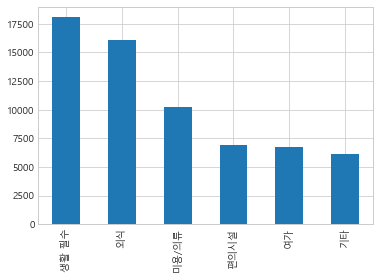

In [24]:
store_2021['서비스_업종_코드_명'].value_counts().plot(kind='bar')

In [25]:
total_cat_revenue = store_2021.groupby(['상권_코드', '기준_분기_코드', '서비스_업종_코드_명'])['분기당_매출_금액'].sum()
quat_ratio_revenue = store_2021.groupby(['상권_코드','기준_분기_코드'])['분기당_매출_금액'].sum()
tmp_df = (total_cat_revenue / quat_ratio_revenue).unstack(level=-1)
print((tmp_df.isnull().sum())/len(tmp_df), '\n')

total_cat_revenue = store_2020.groupby(['상권_코드', '기준_분기_코드', '서비스_업종_코드_명'])['분기당_매출_금액'].sum()
quat_ratio_revenue = store_2020.groupby(['상권_코드','기준_분기_코드'])['분기당_매출_금액'].sum()
tmp_df = (total_cat_revenue / quat_ratio_revenue).unstack(level=-1)
print((tmp_df.isnull().sum())/len(tmp_df), '\n')

total_cat_revenue = store_2019.groupby(['상권_코드', '기준_분기_코드', '서비스_업종_코드_명'])['분기당_매출_금액'].sum()
quat_ratio_revenue = store_2019.groupby(['상권_코드','기준_분기_코드'])['분기당_매출_금액'].sum()
tmp_df = (total_cat_revenue / quat_ratio_revenue).unstack(level=-1)
print((tmp_df.isnull().sum())/len(tmp_df), '\n')

total_cat_revenue = store_2018.groupby(['상권_코드', '기준_분기_코드', '서비스_업종_코드_명'])['분기당_매출_금액'].sum()
quat_ratio_revenue = store_2018.groupby(['상권_코드','기준_분기_코드'])['분기당_매출_금액'].sum()
tmp_df = (total_cat_revenue / quat_ratio_revenue).unstack(level=-1)
print((tmp_df.isnull().sum())/len(tmp_df))

서비스_업종_코드_명
기타       0.175000
미용/의류    0.036486
생활 필수    0.013851
여가       0.185135
외식       0.014189
편의시설     0.171622
dtype: float64 

서비스_업종_코드_명
기타       0.160892
미용/의류    0.034477
생활 필수    0.011154
여가       0.170526
외식       0.013520
편의시설     0.157343
dtype: float64 

서비스_업종_코드_명
기타       0.153690
미용/의류    0.039520
생활 필수    0.011991
여가       0.159939
외식       0.011991
편의시설     0.143219
dtype: float64 

서비스_업종_코드_명
기타       0.080667
미용/의류    0.025429
생활 필수    0.008589
여가       0.131021
외식       0.009599
편의시설     0.081846
dtype: float64


# 2020년
## 2020년 시각화

In [26]:
copy_2020= store_2020[['주중_매출_금액', '주말_매출_금액', '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액',
                       '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액',
                       '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액',
                       '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액',
                       '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액',
                       '연령대_50_매출_금액', '연령대_60_이상_매출_금액']]

In [27]:
copy_2020.head()

,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액
0,1497817.0,32352856.0,0,0.0,1497817,0,0,32352856,0,0,1497817,1397963.0,30954893.0,0.0,0,1397963.0,32452710.0,0,0,0,0.0,30954893,2895780
1,24574631.0,10636780.0,0,0.0,24207845,0,366786,0,10636780,0,0,2567499.0,32643912.0,0.0,0,0.0,35211411.0,0,0,28792664,6418747.0,0,0
2,22367209.0,0.0,0,13450049.0,8917160,0,0,0,0,0,0,0.0,0.0,22367209.0,0,12909615.0,9457594.0,0,0,0,22367209.0,0,0
3,985883.0,0.0,0,0.0,985883,0,0,0,0,985883,0,0.0,0.0,0.0,0,985883.0,0.0,0,0,985883,0.0,0,0
4,347666954.0,83775501.0,57836408,62676591.0,76100528,74583641,76469786,44469818,39305683,0,2948631,199264316.0,50651452.0,152694784.0,25883272,191019483.0,152066866.0,2544277,69650930,91286746,72418118.0,65658966,41527310


In [28]:
how_much_skew(copy_2020)

시간대_00~06_매출_금액    155.133211
화요일_매출_금액           73.878639
일요일_매출_금액           71.437435
시간대_14~17_매출_금액     70.738886
주말_매출_금액            67.773559
월요일_매출_금액           66.224724
토요일_매출_금액           66.007078
주중_매출_금액            65.224004
시간대_11~14_매출_금액     64.800331
목요일_매출_금액           64.024619
수요일_매출_금액           63.967456
연령대_10_매출_금액        63.032474
금요일_매출_금액           61.994116
남성_매출_금액            61.150147
연령대_40_매출_금액        58.443340
연령대_60_이상_매출_금액     56.828867
시간대_06~11_매출_금액     55.244637
시간대_17~21_매출_금액     54.718648
연령대_50_매출_금액        48.965401
연령대_30_매출_금액        45.498926
여성_매출_금액            35.817594
연령대_20_매출_금액        33.242802
시간대_21~24_매출_금액     22.454058
dtype: float64
Index(['시간대_00~06_매출_금액', '화요일_매출_금액', '일요일_매출_금액', '시간대_14~17_매출_금액',
       '주말_매출_금액', '월요일_매출_금액', '토요일_매출_금액', '주중_매출_금액', '시간대_11~14_매출_금액',
       '목요일_매출_금액', '수요일_매출_금액', '연령대_10_매출_금액', '금요일_매출_금액', '남성_매출_금액',
       '연령대_40_매출_금액', '연령대_60_이상_매출_금액', '시간대_06~11_매출_금액', '시간대_17~21_매출

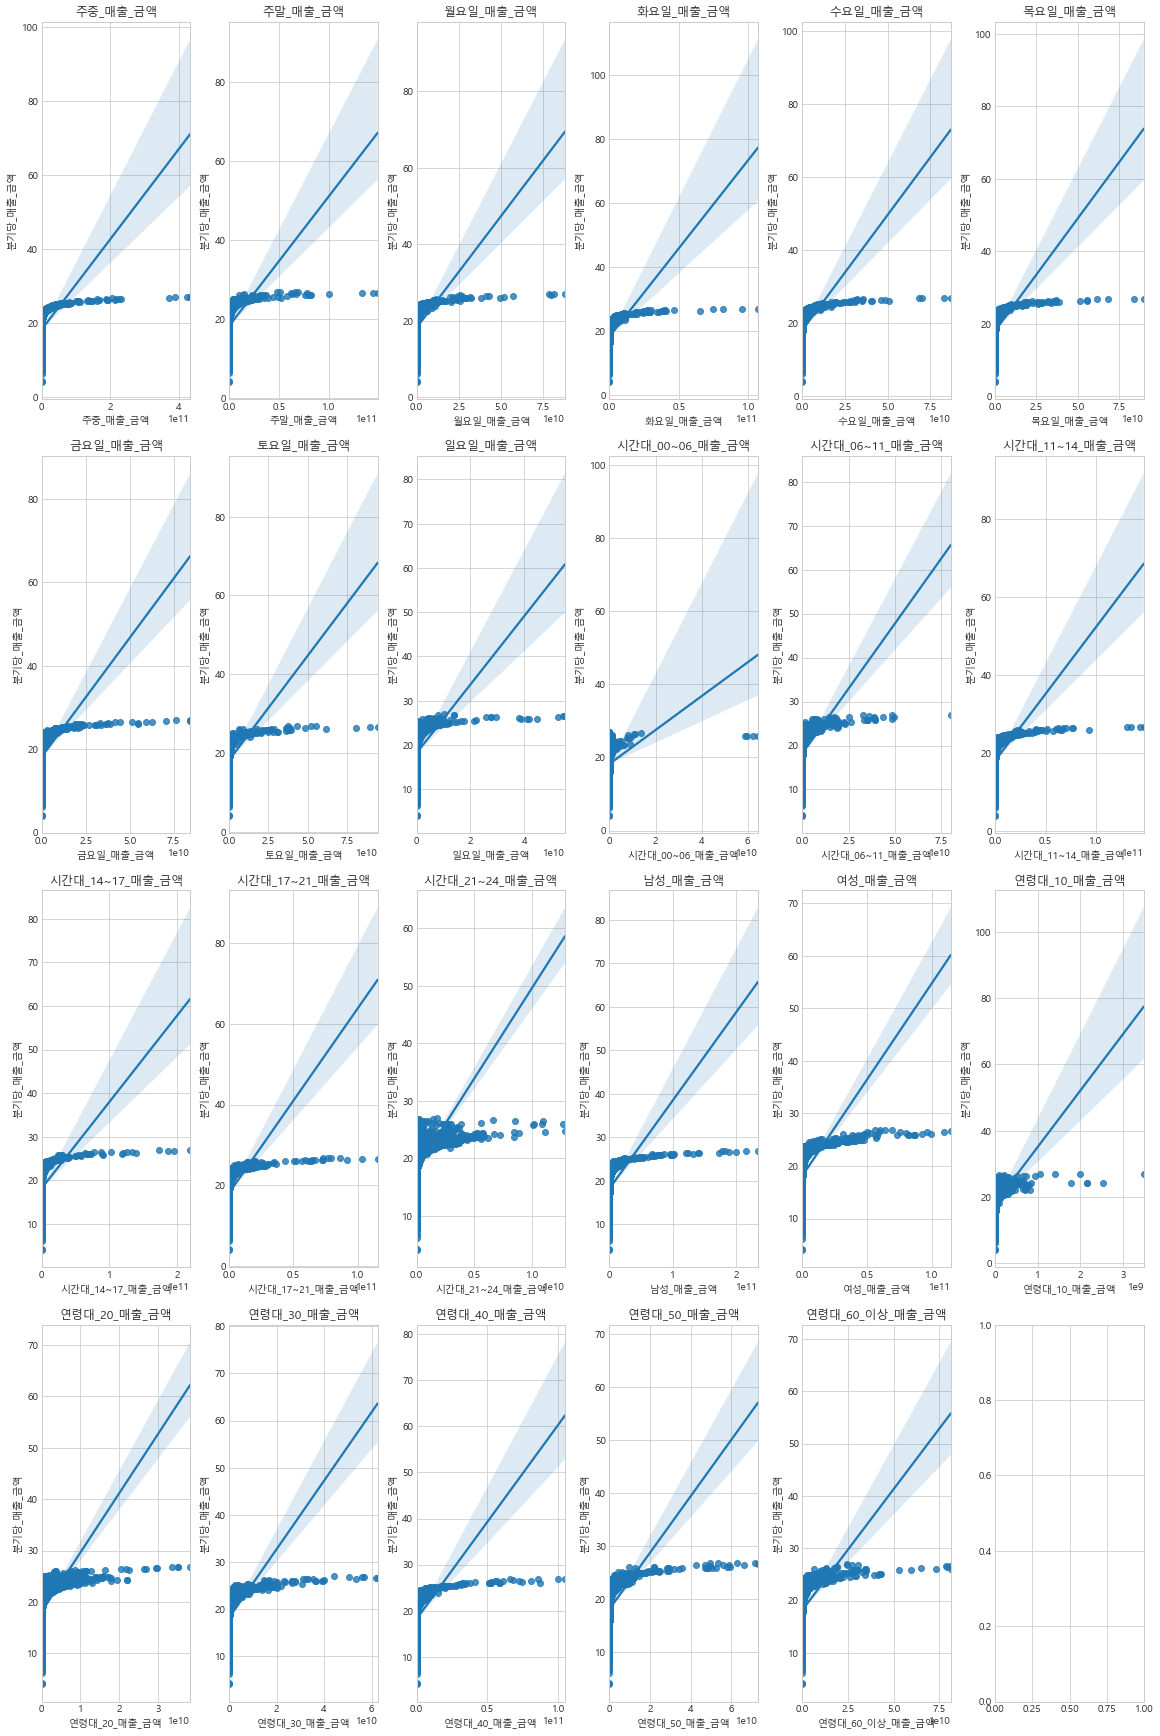

In [29]:
regplot(copy_2020, store_2020)

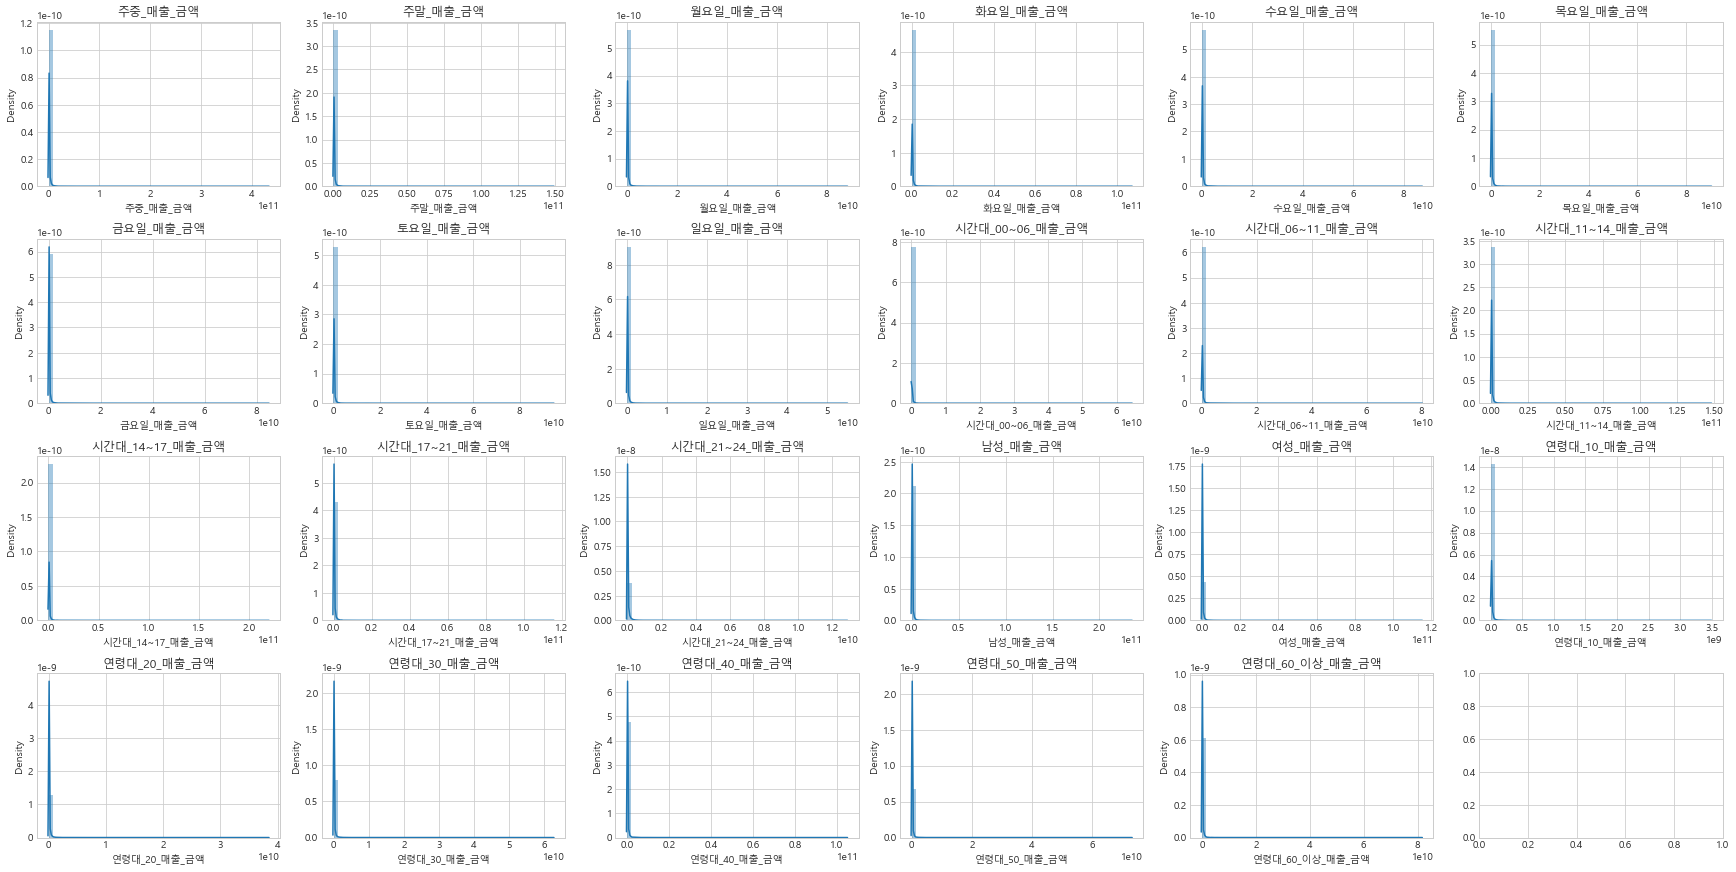

In [30]:
distplot(copy_2020)

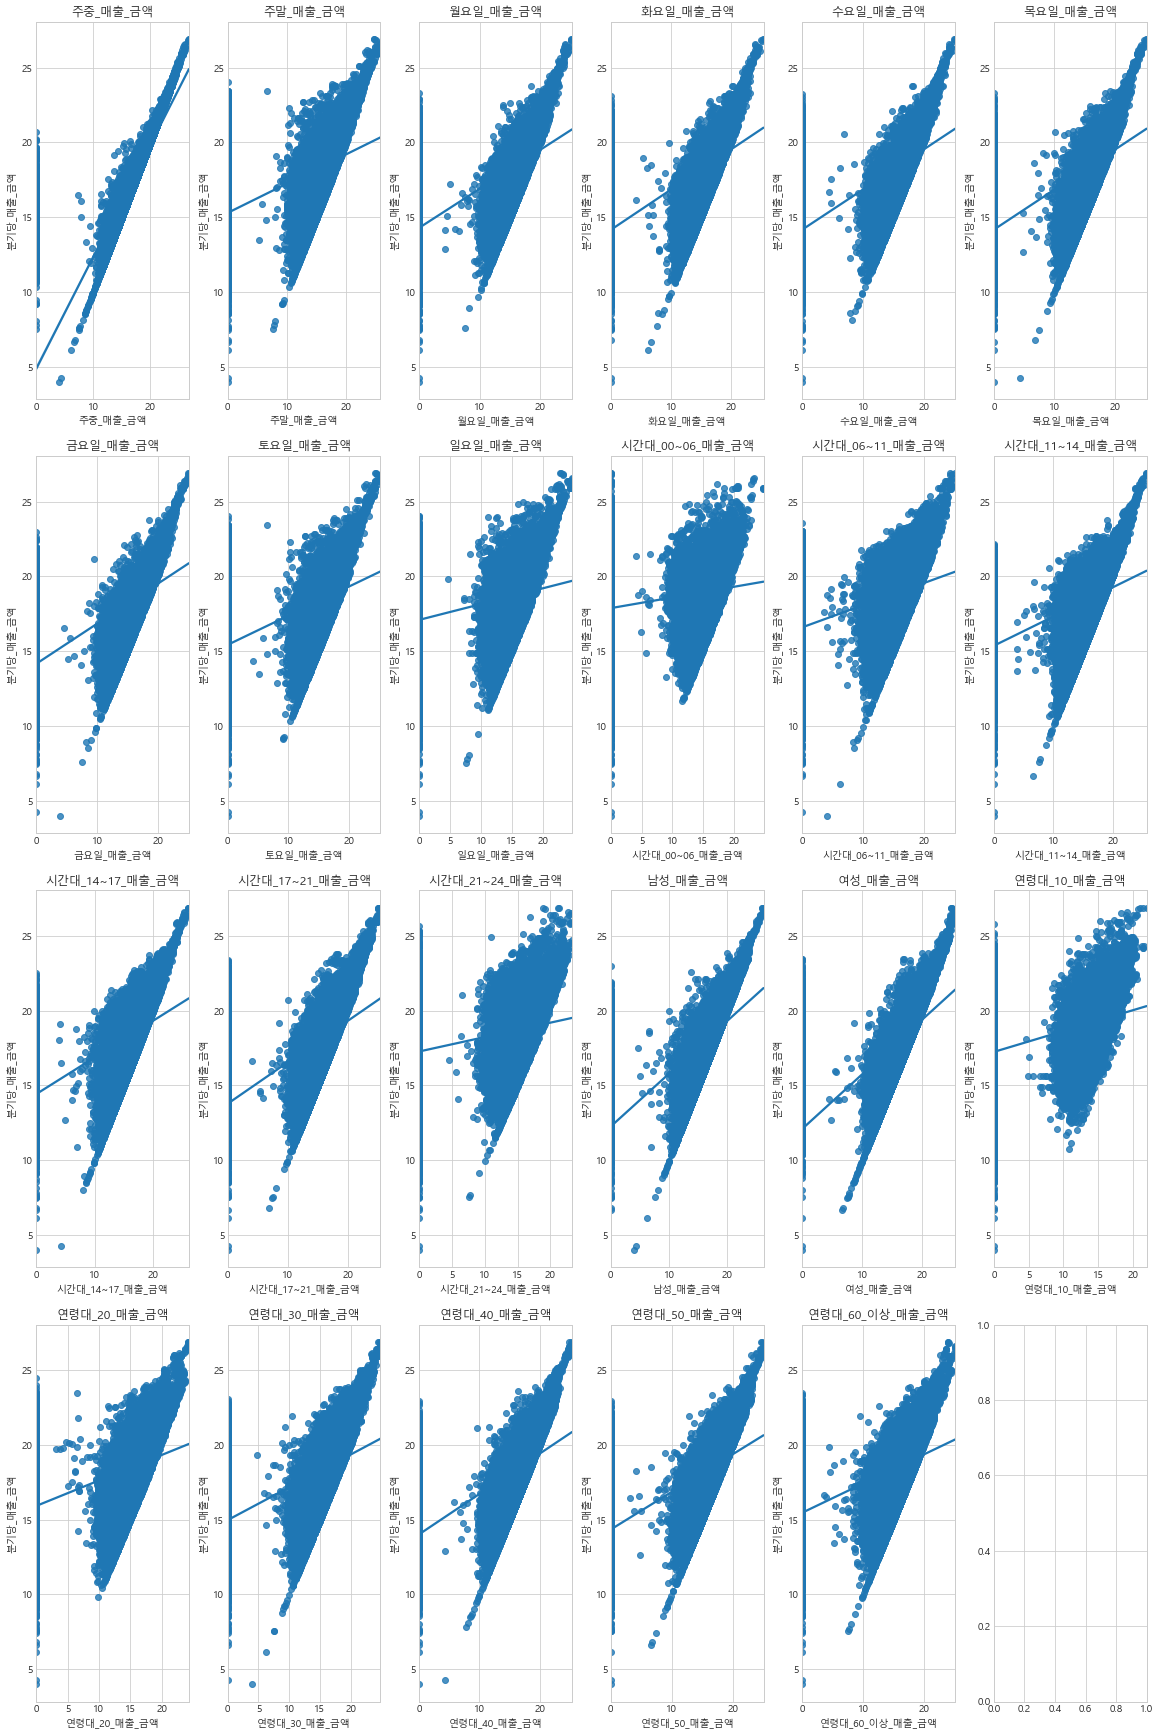

In [31]:
log1p_regplot(copy_2020, store_2020)

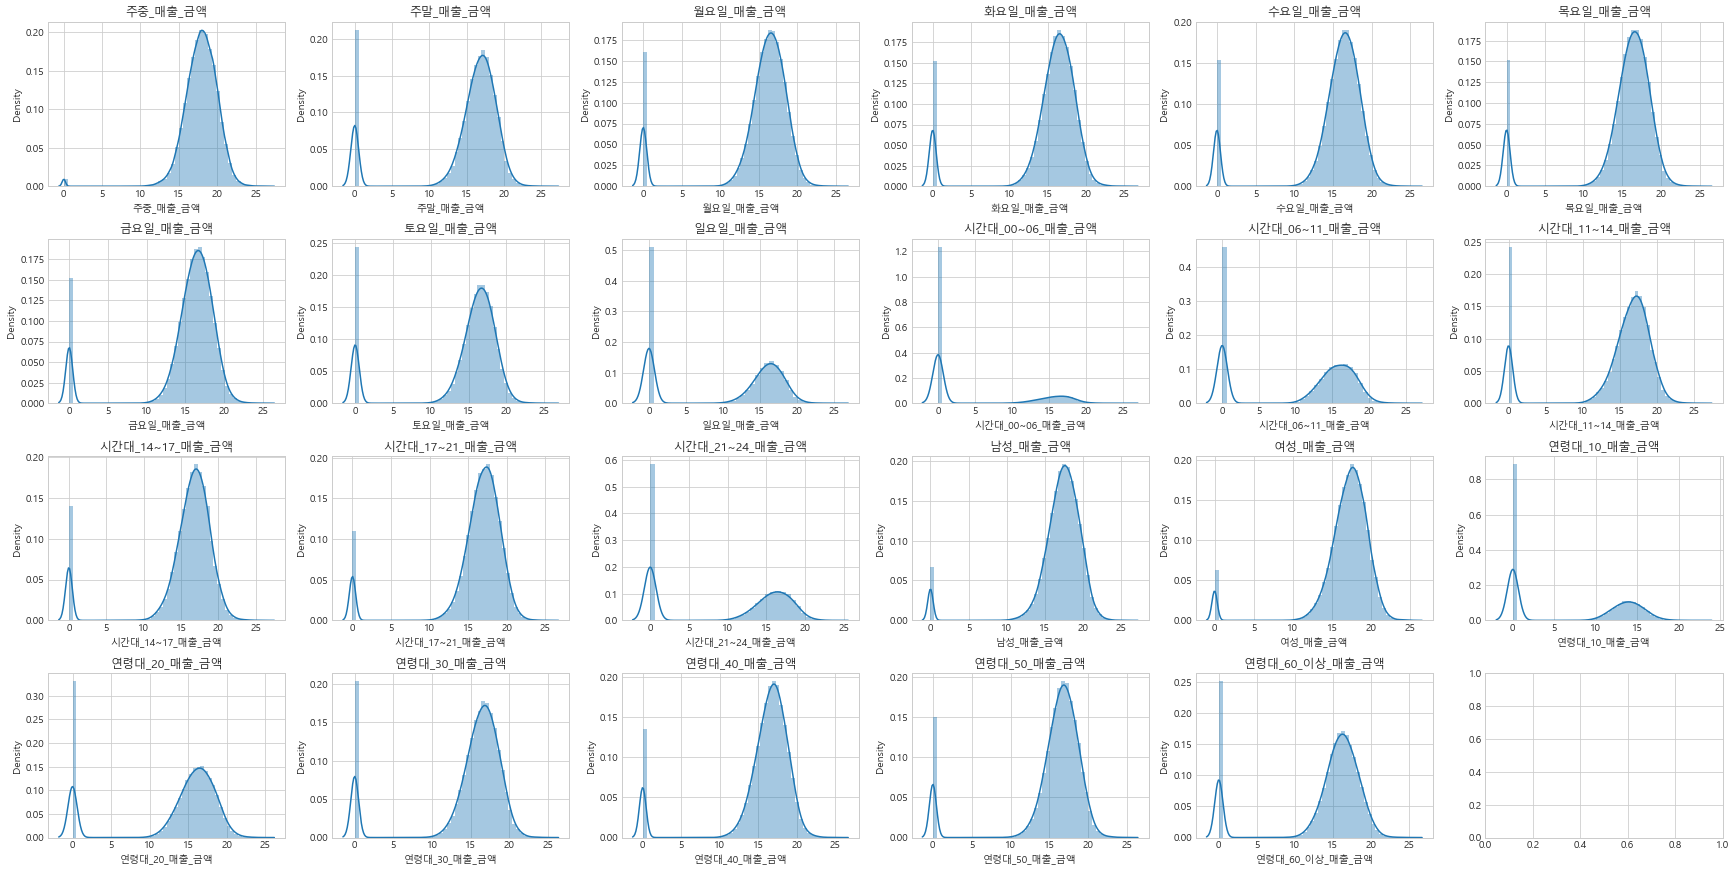

In [32]:
log1p_distplot(copy_2020)

## 2020년 전처리

In [33]:
# 0 값이 40%를 넘으면 그 feature를 삭제하며 0값을 그 feature의 평균값으로 치환
prepro_2020 = drop_col(store_2020)
prepro_2020.head(2)

,기준_년_코드,기준_분기_코드,상권_구분_코드_명,상권_코드,서비스_업종_코드_명,분기당_매출_금액,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액
0,2020,3,전통시장,1001370,생활 필수,33850673.0,1497817.0,32352856.0,8.669824e+07,8.830406e+07,1497817.0,8.866941e+07,9.334217e+07,3.235286e+07,6.693246e+07,1.497817e+06,1397963.0,30954893.0,1.537465e+08,6.480627e+07,1.397963e+06,32452710.0,9.010953e+07,1.061190e+08,1.188149e+08,3.095489e+07,2.895780e+06
1,2020,3,전통시장,1001386,편의시설,35211411.0,24574631.0,10636780.0,8.669824e+07,8.830406e+07,24207845.0,8.866941e+07,3.667860e+05,8.682790e+07,1.063678e+07,7.915496e+07,2567499.0,32643912.0,1.537465e+08,6.480627e+07,2.554286e+08,35211411.0,9.010953e+07,2.879266e+07,6.418747e+06,1.110219e+08,9.289797e+07


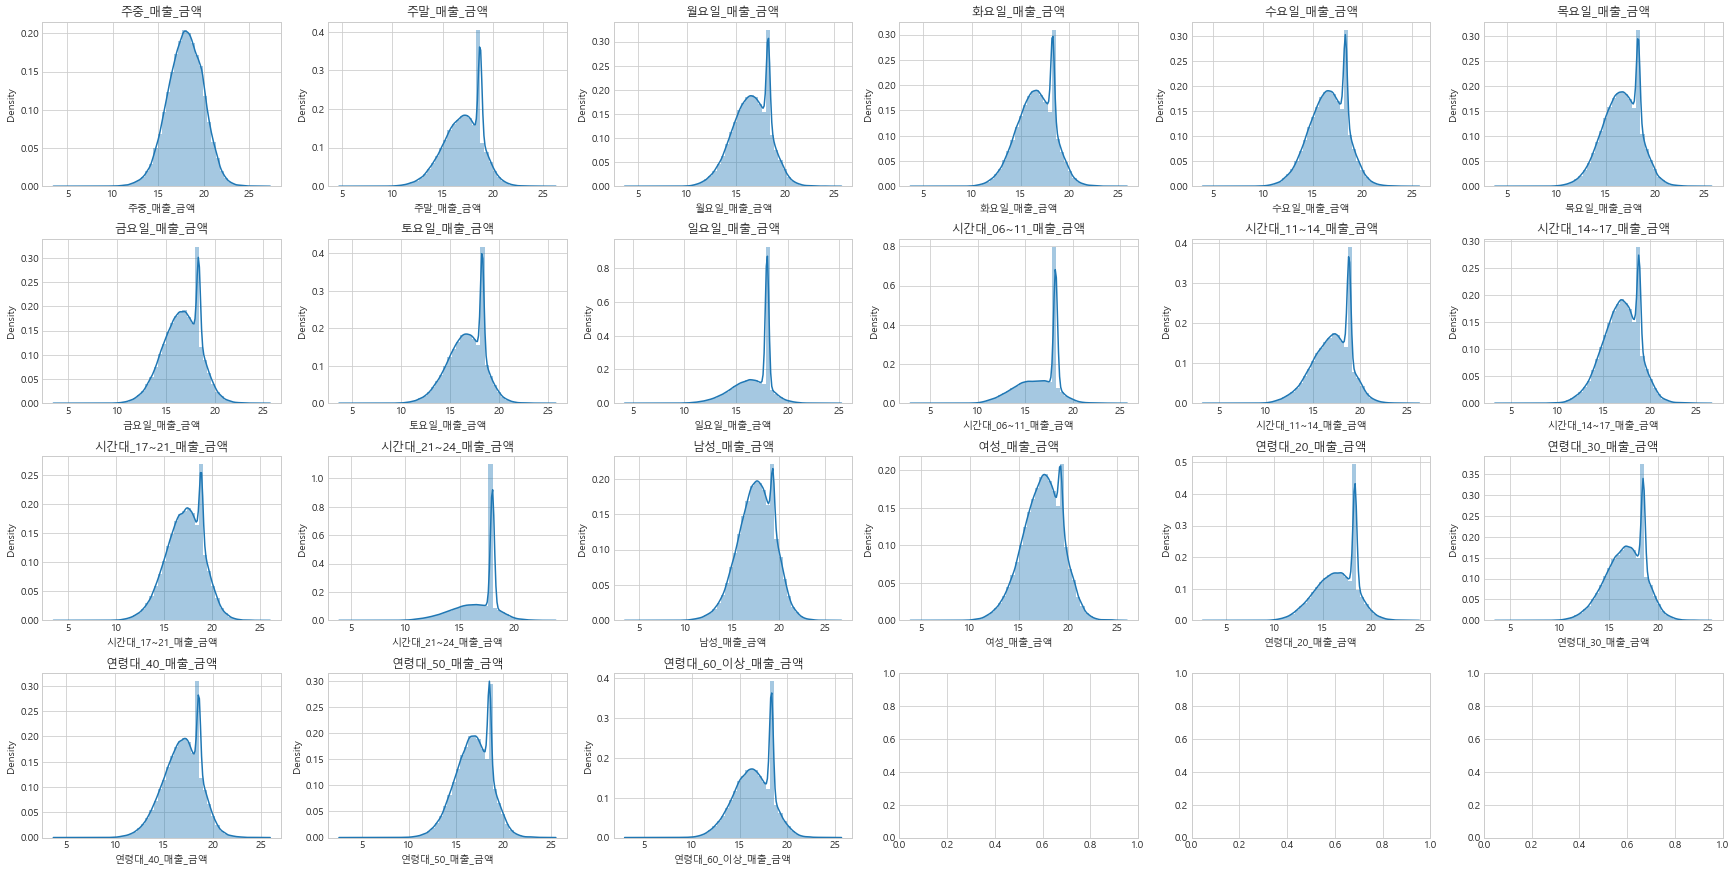

In [34]:
log1p_distplot(prepro_2020.iloc[:,6:])

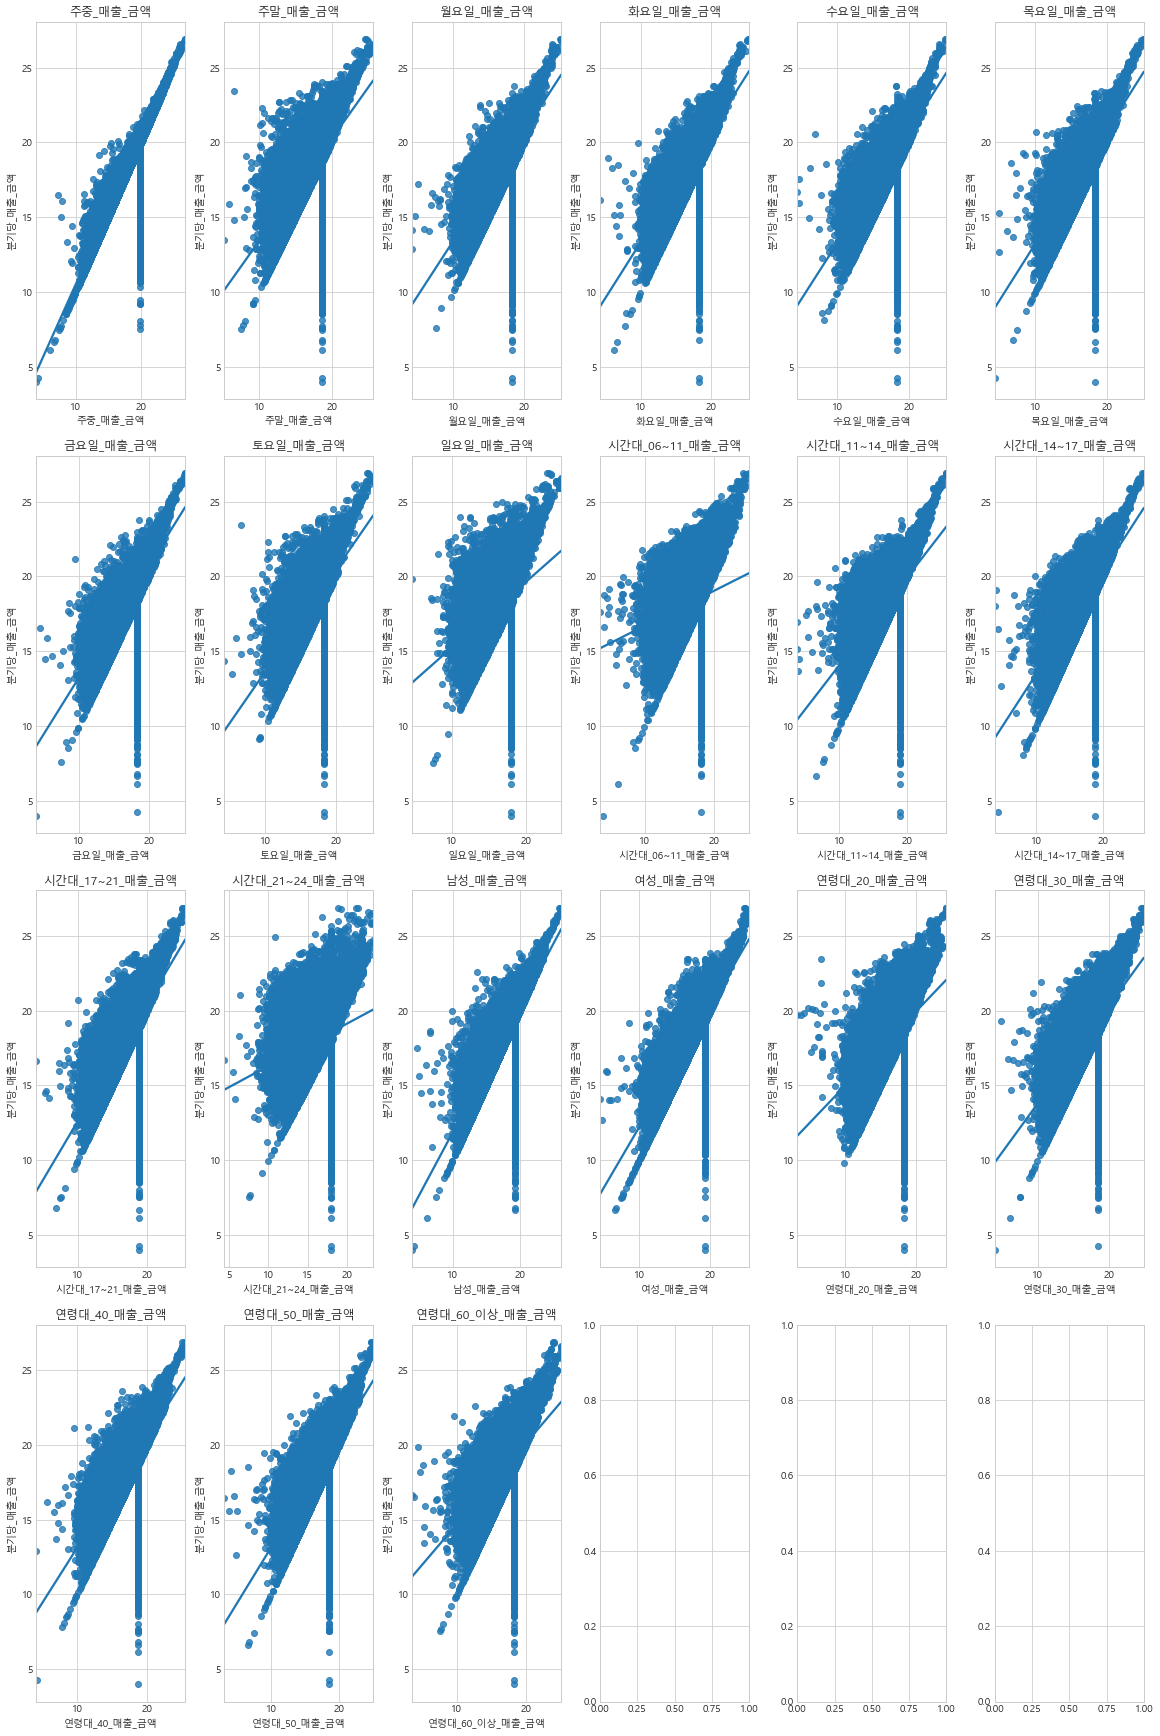

In [35]:
log1p_regplot(prepro_2020.iloc[:,6:], store_2020)

In [36]:
## 주중 총매출 비율
weekday = make_ratio(prepro_2020, '주중_매출_금액')
weekday=weekday.unstack(-1)
weekday.columns = ['2020년 '+str(j) +  ' 분기 ' + str(i) for i, j in weekday.columns]
# 3분기 4분기만 추출한다.
new_table_2020 = weekday.iloc[:,2:4]
new_table_2020.head()

,2020년 3 분기 주중_매출_금액,2020년 4 분기 주중_매출_금액
상권_코드,,
1000001,0.709416,0.656625
1000002,0.661763,0.649099
1000003,0.778724,0.715977
1000004,0.789170,0.771862
1000005,0.604655,0.598186


In [37]:
## 주말 총매출 비율
weekend = make_ratio(prepro_2020, '주말_매출_금액')
weekend = weekend.unstack(-1)
weekend.columns = ['2020년 '+str(j) +  ' 분기 ' + str(i) for i, j in weekend.columns]
# 3분기 4분기만 추출한다.
new_table_2020 = pd.merge(new_table_2020, weekend.iloc[:,2:4], right_index=True, left_index=True)
new_table_2020.head()

,2020년 3 분기 주중_매출_금액,2020년 4 분기 주중_매출_금액,2020년 3 분기 주말_매출_금액,2020년 4 분기 주말_매출_금액
상권_코드,,,,
1000001,0.709416,0.656625,0.290584,0.343375
1000002,0.661763,0.649099,0.418317,0.380181
1000003,0.778724,0.715977,0.339006,0.343239
1000004,0.789170,0.771862,0.307200,0.329719
1000005,0.604655,0.598186,0.395345,0.401814


In [38]:
# 시간대 총매출 비율
time_14_17 = make_ratio(prepro_2020, '시간대_14~17_매출_금액')
time_14_17 = time_14_17.unstack(-1)
time_14_17.columns = ['2020년 '+str(j) +  ' 분기 ' + str(i) for i, j in time_14_17.columns]
# 3분기 4분기만 추출한다.
new_table_2020 = pd.merge(new_table_2020, time_14_17.iloc[:,2:4], right_index=True, left_index=True)
new_table_2020.head()

,2020년 3 분기 주중_매출_금액,2020년 4 분기 주중_매출_금액,2020년 3 분기 주말_매출_금액,2020년 4 분기 주말_매출_금액,2020년 3 분기 시간대_14~17_매출_금액,2020년 4 분기 시간대_14~17_매출_금액
상권_코드,,,,,,
1000001,0.709416,0.656625,0.290584,0.343375,0.240275,0.306417
1000002,0.661763,0.649099,0.418317,0.380181,0.351183,0.392365
1000003,0.778724,0.715977,0.339006,0.343239,0.313655,0.351314
1000004,0.789170,0.771862,0.307200,0.329719,0.220848,0.209968
1000005,0.604655,0.598186,0.395345,0.401814,0.209046,0.270770


In [39]:
time_17_21 = make_ratio(prepro_2020, '시간대_17~21_매출_금액')
time_17_21 = time_17_21.unstack(-1)
time_17_21.columns = ['2020년 '+str(j) +  ' 분기 ' + str(i) for i, j in time_17_21.columns]
# 3분기 4분기만 추출한다.
new_table_2020 = pd.merge(new_table_2020, time_17_21.iloc[:,2:4], right_index=True, left_index=True)

print(new_table_2020.shape)
new_table_2020.head()

(1480, 8)


,2020년 3 분기 주중_매출_금액,2020년 4 분기 주중_매출_금액,2020년 3 분기 주말_매출_금액,2020년 4 분기 주말_매출_금액,2020년 3 분기 시간대_14~17_매출_금액,2020년 4 분기 시간대_14~17_매출_금액,2020년 3 분기 시간대_17~21_매출_금액,2020년 4 분기 시간대_17~21_매출_금액
상권_코드,,,,,,,,
1000001,0.709416,0.656625,0.290584,0.343375,0.240275,0.306417,0.322803,0.296439
1000002,0.661763,0.649099,0.418317,0.380181,0.351183,0.392365,0.354221,0.261982
1000003,0.778724,0.715977,0.339006,0.343239,0.313655,0.351314,0.389212,0.302287
1000004,0.789170,0.771862,0.307200,0.329719,0.220848,0.209968,0.287402,0.342415
1000005,0.604655,0.598186,0.395345,0.401814,0.209046,0.270770,0.469458,0.434021


In [40]:
# 성별 총매출 비율
female = make_ratio(prepro_2020, '여성_매출_금액')
female = female.unstack(-1)
female.columns = ['2020년 '+str(j) +  ' 분기 ' + str(i) for i, j in female.columns]
# 3분기 4분기만 추출한다.
new_table_2020 = pd.merge(new_table_2020, female.iloc[:,2:4], right_index=True, left_index=True)

print(new_table_2020.shape)
new_table_2020.head()

(1480, 10)


,2020년 3 분기 주중_매출_금액,2020년 4 분기 주중_매출_금액,2020년 3 분기 주말_매출_금액,2020년 4 분기 주말_매출_금액,2020년 3 분기 시간대_14~17_매출_금액,2020년 4 분기 시간대_14~17_매출_금액,2020년 3 분기 시간대_17~21_매출_금액,2020년 4 분기 시간대_17~21_매출_금액,2020년 3 분기 여성_매출_금액,2020년 4 분기 여성_매출_금액
상권_코드,,,,,,,,,,
1000001,0.709416,0.656625,0.290584,0.343375,0.240275,0.306417,0.322803,0.296439,0.519923,0.517027
1000002,0.661763,0.649099,0.418317,0.380181,0.351183,0.392365,0.354221,0.261982,0.558454,0.540534
1000003,0.778724,0.715977,0.339006,0.343239,0.313655,0.351314,0.389212,0.302287,0.357852,0.362724
1000004,0.789170,0.771862,0.307200,0.329719,0.220848,0.209968,0.287402,0.342415,0.386303,0.442158
1000005,0.604655,0.598186,0.395345,0.401814,0.209046,0.270770,0.469458,0.434021,0.473066,0.442604


In [41]:
male = make_ratio(prepro_2020, '남성_매출_금액')
male = male.unstack(-1)
male.columns = ['2020년 '+str(j) +  ' 분기 ' + str(i) for i, j in male.columns]
# 3분기 4분기만 추출한다.
new_table_2020 = pd.merge(new_table_2020, male.iloc[:,2:4], right_index=True, left_index=True)

print(new_table_2020.shape)
new_table_2020.head()

(1480, 12)


,2020년 3 분기 주중_매출_금액,2020년 4 분기 주중_매출_금액,2020년 3 분기 주말_매출_금액,2020년 4 분기 주말_매출_금액,2020년 3 분기 시간대_14~17_매출_금액,2020년 4 분기 시간대_14~17_매출_금액,2020년 3 분기 시간대_17~21_매출_금액,2020년 4 분기 시간대_17~21_매출_금액,2020년 3 분기 여성_매출_금액,2020년 4 분기 여성_매출_금액,2020년 3 분기 남성_매출_금액,2020년 4 분기 남성_매출_금액
상권_코드,,,,,,,,,,,,
1000001,0.709416,0.656625,0.290584,0.343375,0.240275,0.306417,0.322803,0.296439,0.519923,0.517027,0.390261,0.392987
1000002,0.661763,0.649099,0.418317,0.380181,0.351183,0.392365,0.354221,0.261982,0.558454,0.540534,0.493078,0.393995
1000003,0.778724,0.715977,0.339006,0.343239,0.313655,0.351314,0.389212,0.302287,0.357852,0.362724,0.578914,0.551087
1000004,0.789170,0.771862,0.307200,0.329719,0.220848,0.209968,0.287402,0.342415,0.386303,0.442158,0.554166,0.514906
1000005,0.604655,0.598186,0.395345,0.401814,0.209046,0.270770,0.469458,0.434021,0.473066,0.442604,0.410424,0.443671


In [42]:
# 연령대
age_30 = make_ratio(prepro_2020, '연령대_30_매출_금액')
age_30 = age_30.unstack(-1)
age_30.columns = ['2020년 '+str(j) +  ' 분기 ' + str(i) for i, j in age_30.columns]
# 3분기 4분기만 추출한다.
new_table_2020 = pd.merge(new_table_2020, age_30.iloc[:,2:4], right_index=True, left_index=True)

print(new_table_2020.shape)
new_table_2020.head()

(1480, 14)


,2020년 3 분기 주중_매출_금액,2020년 4 분기 주중_매출_금액,2020년 3 분기 주말_매출_금액,2020년 4 분기 주말_매출_금액,2020년 3 분기 시간대_14~17_매출_금액,2020년 4 분기 시간대_14~17_매출_금액,2020년 3 분기 시간대_17~21_매출_금액,2020년 4 분기 시간대_17~21_매출_금액,2020년 3 분기 여성_매출_금액,2020년 4 분기 여성_매출_금액,2020년 3 분기 남성_매출_금액,2020년 4 분기 남성_매출_금액,2020년 3 분기 연령대_30_매출_금액,2020년 4 분기 연령대_30_매출_금액
상권_코드,,,,,,,,,,,,,,
1000001,0.709416,0.656625,0.290584,0.343375,0.240275,0.306417,0.322803,0.296439,0.519923,0.517027,0.390261,0.392987,0.266374,0.283578
1000002,0.661763,0.649099,0.418317,0.380181,0.351183,0.392365,0.354221,0.261982,0.558454,0.540534,0.493078,0.393995,0.198916,0.133970
1000003,0.778724,0.715977,0.339006,0.343239,0.313655,0.351314,0.389212,0.302287,0.357852,0.362724,0.578914,0.551087,0.346180,0.305692
1000004,0.789170,0.771862,0.307200,0.329719,0.220848,0.209968,0.287402,0.342415,0.386303,0.442158,0.554166,0.514906,0.161712,0.128015
1000005,0.604655,0.598186,0.395345,0.401814,0.209046,0.270770,0.469458,0.434021,0.473066,0.442604,0.410424,0.443671,0.240242,0.243193


In [43]:
age_40 = make_ratio(prepro_2020, '연령대_40_매출_금액')
age_40 = age_40.unstack(-1)
age_40.columns = ['2020년 '+str(j) +  ' 분기 ' + str(i) for i, j in age_40.columns]
# 3분기 4분기만 추출한다.
new_table_2020 = pd.merge(new_table_2020, age_40.iloc[:,2:4], right_index=True, left_index=True)

print(new_table_2020.shape)
new_table_2020.head()

(1480, 16)


,2020년 3 분기 주중_매출_금액,2020년 4 분기 주중_매출_금액,2020년 3 분기 주말_매출_금액,2020년 4 분기 주말_매출_금액,2020년 3 분기 시간대_14~17_매출_금액,2020년 4 분기 시간대_14~17_매출_금액,2020년 3 분기 시간대_17~21_매출_금액,2020년 4 분기 시간대_17~21_매출_금액,2020년 3 분기 여성_매출_금액,2020년 4 분기 여성_매출_금액,2020년 3 분기 남성_매출_금액,2020년 4 분기 남성_매출_금액,2020년 3 분기 연령대_30_매출_금액,2020년 4 분기 연령대_30_매출_금액,2020년 3 분기 연령대_40_매출_금액,2020년 4 분기 연령대_40_매출_금액
상권_코드,,,,,,,,,,,,,,,,
1000001,0.709416,0.656625,0.290584,0.343375,0.240275,0.306417,0.322803,0.296439,0.519923,0.517027,0.390261,0.392987,0.266374,0.283578,0.261558,0.218192
1000002,0.661763,0.649099,0.418317,0.380181,0.351183,0.392365,0.354221,0.261982,0.558454,0.540534,0.493078,0.393995,0.198916,0.133970,0.253846,0.192287
1000003,0.778724,0.715977,0.339006,0.343239,0.313655,0.351314,0.389212,0.302287,0.357852,0.362724,0.578914,0.551087,0.346180,0.305692,0.222355,0.205145
1000004,0.789170,0.771862,0.307200,0.329719,0.220848,0.209968,0.287402,0.342415,0.386303,0.442158,0.554166,0.514906,0.161712,0.128015,0.136029,0.183115
1000005,0.604655,0.598186,0.395345,0.401814,0.209046,0.270770,0.469458,0.434021,0.473066,0.442604,0.410424,0.443671,0.240242,0.243193,0.242263,0.254921


In [44]:
age_50 = make_ratio(prepro_2020, '연령대_50_매출_금액')
age_50 = age_50.unstack(-1)
age_50.columns = ['2020년 '+str(j) +  ' 분기 ' + str(i) for i, j in age_50.columns]
# 3분기 4분기만 추출한다.
new_table_2020 = pd.merge(new_table_2020, age_50.iloc[:,2:4], right_index=True, left_index=True)

print(new_table_2020.shape)
new_table_2020.head()

(1480, 18)


,2020년 3 분기 주중_매출_금액,2020년 4 분기 주중_매출_금액,2020년 3 분기 주말_매출_금액,2020년 4 분기 주말_매출_금액,2020년 3 분기 시간대_14~17_매출_금액,2020년 4 분기 시간대_14~17_매출_금액,2020년 3 분기 시간대_17~21_매출_금액,2020년 4 분기 시간대_17~21_매출_금액,2020년 3 분기 여성_매출_금액,2020년 4 분기 여성_매출_금액,2020년 3 분기 남성_매출_금액,2020년 4 분기 남성_매출_금액,2020년 3 분기 연령대_30_매출_금액,2020년 4 분기 연령대_30_매출_금액,2020년 3 분기 연령대_40_매출_금액,2020년 4 분기 연령대_40_매출_금액,2020년 3 분기 연령대_50_매출_금액,2020년 4 분기 연령대_50_매출_금액
상권_코드,,,,,,,,,,,,,,,,,,
1000001,0.709416,0.656625,0.290584,0.343375,0.240275,0.306417,0.322803,0.296439,0.519923,0.517027,0.390261,0.392987,0.266374,0.283578,0.261558,0.218192,0.174055,0.186077
1000002,0.661763,0.649099,0.418317,0.380181,0.351183,0.392365,0.354221,0.261982,0.558454,0.540534,0.493078,0.393995,0.198916,0.133970,0.253846,0.192287,0.238026,0.218922
1000003,0.778724,0.715977,0.339006,0.343239,0.313655,0.351314,0.389212,0.302287,0.357852,0.362724,0.578914,0.551087,0.346180,0.305692,0.222355,0.205145,0.165958,0.210668
1000004,0.789170,0.771862,0.307200,0.329719,0.220848,0.209968,0.287402,0.342415,0.386303,0.442158,0.554166,0.514906,0.161712,0.128015,0.136029,0.183115,0.192111,0.179378
1000005,0.604655,0.598186,0.395345,0.401814,0.209046,0.270770,0.469458,0.434021,0.473066,0.442604,0.410424,0.443671,0.240242,0.243193,0.242263,0.254921,0.183371,0.192788


# base 인덱스와 merge

In [45]:
years = ['2020년 3 분기 ', '2020년 4 분기 ', '2021년 1 분기 ', '2021년 2 분기 ']
orders = ['주중','주말','시간대_14~17','시간대_17~21','여성','남성','연령대_30','연령대_40','연령대_50']

col_arange = []
for order in orders:
    for year in years:
         col_arange.append(year+order+'_매출_금액')
            
total_table = pd.merge(new_table_2020, new_table, right_index=True, left_index=True)
total_table= total_table[col_arange]
total_table

,2020년 3 분기 주중_매출_금액,2020년 4 분기 주중_매출_금액,2021년 1 분기 주중_매출_금액,2021년 2 분기 주중_매출_금액,2020년 3 분기 주말_매출_금액,2020년 4 분기 주말_매출_금액,2021년 1 분기 주말_매출_금액,2021년 2 분기 주말_매출_금액,2020년 3 분기 시간대_14~17_매출_금액,2020년 4 분기 시간대_14~17_매출_금액,2021년 1 분기 시간대_14~17_매출_금액,2021년 2 분기 시간대_14~17_매출_금액,2020년 3 분기 시간대_17~21_매출_금액,2020년 4 분기 시간대_17~21_매출_금액,2021년 1 분기 시간대_17~21_매출_금액,2021년 2 분기 시간대_17~21_매출_금액,2020년 3 분기 여성_매출_금액,2020년 4 분기 여성_매출_금액,2021년 1 분기 여성_매출_금액,2021년 2 분기 여성_매출_금액,2020년 3 분기 남성_매출_금액,2020년 4 분기 남성_매출_금액,2021년 1 분기 남성_매출_금액,2021년 2 분기 남성_매출_금액,2020년 3 분기 연령대_30_매출_금액,2020년 4 분기 연령대_30_매출_금액,2021년 1 분기 연령대_30_매출_금액,2021년 2 분기 연령대_30_매출_금액,2020년 3 분기 연령대_40_매출_금액,2020년 4 분기 연령대_40_매출_금액,2021년 1 분기 연령대_40_매출_금액,2021년 2 분기 연령대_40_매출_금액,2020년 3 분기 연령대_50_매출_금액,2020년 4 분기 연령대_50_매출_금액,2021년 1 분기 연령대_50_매출_금액,2021년 2 분기 연령대_50_매출_금액
상권_코드,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000001,0.709416,0.656625,0.802027,0.685585,0.290584,0.343375,0.309408,0.314415,0.240275,0.306417,0.344747,0.285830,0.322803,0.296439,0.274264,0.278362,0.519923,0.517027,0.631982,0.585425,0.390261,0.392987,0.329257,0.303938,0.266374,0.283578,0.255775,0.270705,0.261558,0.218192,0.264489,0.222893,0.174055,0.186077,0.161625,0.153722
1000002,0.661763,0.649099,0.649057,0.615219,0.418317,0.380181,0.350943,0.413213,0.351183,0.392365,0.357620,0.341554,0.354221,0.261982,0.245877,0.300832,0.558454,0.540534,0.578683,0.687442,0.493078,0.393995,0.407471,0.353526,0.198916,0.133970,0.178571,0.162541,0.253846,0.192287,0.236231,0.219398,0.238026,0.218922,0.319019,0.305837
1000003,0.778724,0.715977,0.733620,0.676968,0.339006,0.343239,0.393289,0.394920,0.313655,0.351314,0.394704,0.310901,0.389212,0.302287,0.389068,0.348187,0.357852,0.362724,0.448193,0.458493,0.578914,0.551087,0.611371,0.474744,0.346180,0.305692,0.402686,0.316352,0.222355,0.205145,0.253919,0.217562,0.165958,0.210668,0.193379,0.163318
1000004,0.789170,0.771862,0.775598,0.789402,0.307200,0.329719,0.279288,0.308162,0.220848,0.209968,0.318482,0.273783,0.287402,0.342415,0.368592,0.268151,0.386303,0.442158,0.456745,0.430480,0.554166,0.514906,0.523239,0.496997,0.161712,0.128015,0.175804,0.166116,0.136029,0.183115,0.204557,0.154217,0.192111,0.179378,0.211101,0.190894
1000005,0.604655,0.598186,0.584111,0.592343,0.395345,0.401814,0.415889,0.500994,0.209046,0.270770,0.257400,0.242010,0.469458,0.434021,0.466190,0.489783,0.473066,0.442604,0.466735,0.468189,0.410424,0.443671,0.442794,0.512669,0.240242,0.243193,0.209965,0.249969,0.242263,0.254921,0.240253,0.216171,0.183371,0.192788,0.208025,0.260695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001486,0.920530,0.893599,0.909803,0.898545,0.079470,0.106401,0.090197,0.101455,0.261275,0.186830,0.258280,0.403931,0.268092,0.074688,0.195804,0.223806,0.448900,0.285453,0.319708,0.505533,0.504351,0.713106,0.680292,0.618059,0.046546,0.023761,0.005615,0.121813,0.095918,0.012258,0.083945,0.088821,0.170510,0.157364,0.240724,0.262109
1001487,0.792620,0.777622,0.781237,0.812808,0.207380,0.261575,0.261228,0.187192,0.288463,0.306325,0.324474,0.296203,0.272109,0.299734,0.236525,0.292740,0.598412,0.580040,0.566039,0.580807,0.261479,0.337617,0.305101,0.272422,0.110982,0.175398,0.094819,0.092171,0.094543,0.157426,0.123695,0.177686,0.235055,0.285524,0.240775,0.244576
1001488,0.749366,0.751088,0.741553,0.724977,0.337531,0.308392,0.321031,0.338300,0.325722,0.355336,0.337913,0.427533,0.404729,0.408804,0.429282,0.417720,0.613061,0.612130,0.671106,0.577108,0.532762,0.513307,0.450136,0.461325,0.261419,0.232059,0.223134,0.201086,0.199887,0.207054,0.209307,0.156955,0.306274,0.311503,0.291061,0.307143


In [46]:
full_table = pd.merge(left=store_code['상권_코드'], right=total_table, on='상권_코드', how='left')
print(full_table.shape)
full_table.to_csv('수정_2020_3분기~2021_2분기.csv', index=False)

(1490, 37)


<AxesSubplot:>

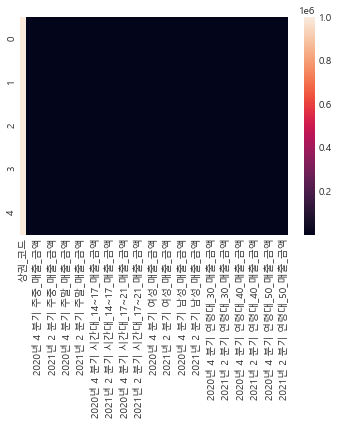

In [6]:
a=pd.read_csv('수정_2020_3분기~2021_2분기.csv').head()
sns.heatmap(a)

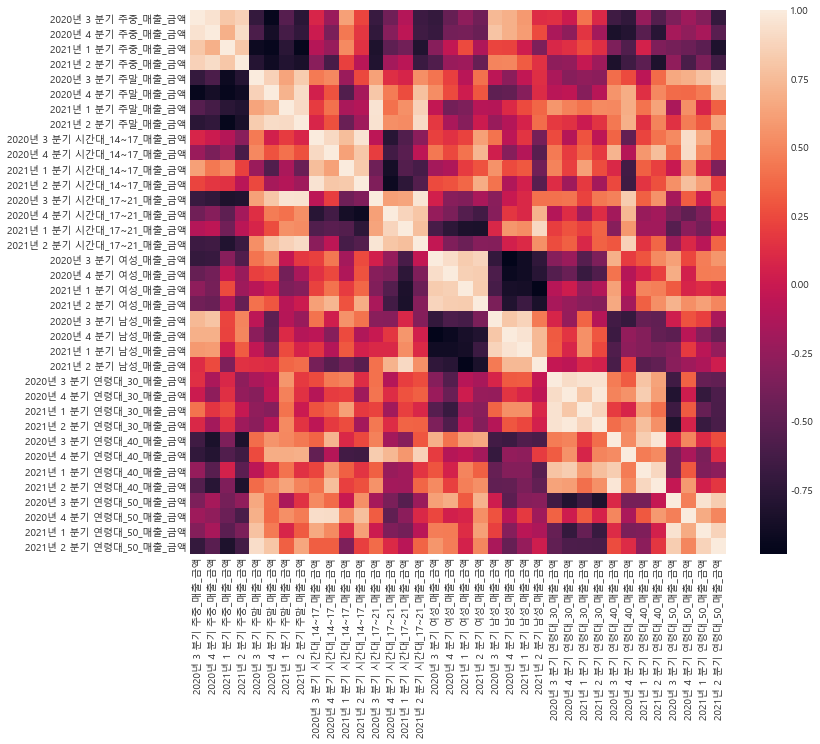

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(a.iloc[:,1:].corr());

# 회귀 계수 도출
## 필요 함수 정의

In [48]:
# 분기당 매출 금액을 기준으로 비율을 구하는 함수
def divide_per_cat(df,col):
    tmp_df = df.groupby(['상권_코드', '기준_분기_코드'])[col].sum().to_frame()
    tmp_df.columns = [col]
    
    return tmp_df

def merge_on_table(df_2021, df_2020, col):
    df_2021 = divide_per_cat( df_2021, col )
    df_2021 = df_2021.unstack()
    df_2021.columns = ['2021년 1분기', '2021년 2분기']
    
    df_2020 = divide_per_cat( df_2020, col )
    df_2020 = df_2020.unstack().iloc[:,2:4]
    df_2020.columns = ['2020년 3분기', '2020년 4분기']

    df = pd.merge(df_2020, df_2021, right_index=True, left_index=True)
    return df

def making_coeff(df, index):
    lr = LinearRegression()
    lr.fit(np.arange(1, len(df.iloc[index,2:].values)+1).reshape(-1, 1), df.iloc[index,2:].values)
    coeff=lr.coef_
    return coeff

## 분기당 총 매출 회귀 계수

In [49]:
revenue = merge_on_table(store_2021, store_2020, '분기당_매출_금액')
# 상권코드 1001278의 2020년 3분기의 매출이 존재하지 않기 때문에 평균값으로 대체
revenue.fillna( (439389.0+2823279.0)/2, inplace=True )
revenue.head()

,2020년 3분기,2020년 4분기,2021년 1분기,2021년 2분기
상권_코드,,,,
1000001,3.330855e+09,3.289855e+09,3560490364,4945371583
1000002,3.386368e+09,4.630761e+09,3219012417,4758520142
1000003,6.955296e+09,6.869209e+09,7390675982,7528112723
1000004,2.813943e+09,2.669599e+09,2465025739,2773489996
1000005,2.753574e+09,2.669249e+09,2112848259,2899075340


In [50]:
coef_list = np.array([])

for i in range(revenue.shape[0]):
    coef = making_coeff(revenue, i)
    coef_list=np.append(coef_list, coef)
    
revenue['coef']=coef_list
revenue.head()

,2020년 3분기,2020년 4분기,2021년 1분기,2021년 2분기,coef
상권_코드,,,,,
1000001,3.330855e+09,3.289855e+09,3560490364,4945371583,1.384881e+09
1000002,3.386368e+09,4.630761e+09,3219012417,4758520142,1.539508e+09
1000003,6.955296e+09,6.869209e+09,7390675982,7528112723,1.374367e+08
1000004,2.813943e+09,2.669599e+09,2465025739,2773489996,3.084643e+08
1000005,2.753574e+09,2.669249e+09,2112848259,2899075340,7.862271e+08


In [51]:
revenue_coef = pd.merge(store_code['상권_코드'], revenue['coef'], left_on='상권_코드', right_index=True, how='outer')
revenue_coef.to_csv('수정_매출_회귀계수.csv', index=False)